#  **Python and ML Internship project**

# **Team members - Sneha Yadav, Riya, Sakshi**
 

In [1]:
# PREDICTION OF INDICATIONS OF CERVICAL CANCER USING BIOPSY TEST

# Loading the required libraries

In [2]:
pip install imbalanced-learn
#to handle imbalanced datasets

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from collections import Counter
#from imblearn.over_sampling import SMOTE  # Make sure imbalanced-learn is installed




#  Reading and Understanding the data

In [5]:
df = pd.read_csv("D:/Research/Research papers/cervical cancer/Datasets/risk_factors_cervical_cancer.csv")

pd.set_option('display.max_columns', 40) #max no. of columns the datframe will display when printed

In [6]:
df.head(40)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


* There are a few '?' values in the data.


In [7]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

* We can see that the columns names contains spaces and colons. So renaming the columns for convenience

In [8]:
df.columns=['Age', 'No_of_sex_partner', 'First_sexual_intercourse',\
                          'No_pregnancies','Smokes',  'Smokes_yrs',  'Smokes_packs_yr',  'Hormonal_Contraceptives',\
                          'Hormonal_Contraceptives_years','IUD', 'IUD_years', 'STDs', 'STDs_number', 'STDs_condylomatosis',\
                          'STDs_cervical_condylomatosis', 'STDs_vaginal_condylomatosis', 'STDs_vulvo_perineal_condylomatosis',\
                          'STDs_syphilis', 'STDs_pelvic_inflammatory_disease', 'STDs_genital_herpes', 'STDs_molluscum_contagiosum',\
                          'STDs_AIDS', 'STDs_HIV', 'STDs_Hepatitis_B', 'STDs_HPV', 'STDs_No_of_diagnosis', 'STD_Time_since_first_diagnosis',\
                          'STDs_Time_since_last_diagnosis', 'Dx_Cancer', 'Dx_CIN', 'Dx_HPV', 'Dx', 'Hinselmann','Schiller' ,'Citology', 'Biopsy']

## Checking the datatypes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   No_of_sex_partner                   858 non-null    object
 2   First_sexual_intercourse            858 non-null    object
 3   No_pregnancies                      858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes_yrs                          858 non-null    object
 6   Smokes_packs_yr                     858 non-null    object
 7   Hormonal_Contraceptives             858 non-null    object
 8   Hormonal_Contraceptives_years       858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD_years                           858 non-null    object
 11  STDs                                858 non-null    object

## Checking the dimensions

In [10]:
df.shape

(858, 36)

## Checking for missing values

In [11]:
## replace ? with NaN
df = df.replace('?', np.NaN)

## Checking the % of missing values in each feature

In [1]:
plt.figure(figsize=(10,10))
np.round(df.isnull().sum()/df.shape[0]*100).sort_values().plot(kind='barh')
#df.isnull returns true for null vales sum takes sum of true values, shape[0] returns no. of rows and then calculating percentage

NameError: name 'plt' is not defined

In [13]:
df.duplicated().sum() 
#indicates true when a row is duplicate and .sum() total number of duplicate rows

23

In [14]:
for i in df.select_dtypes(include="object").columns: #selecting columns with object datatype
    print(df[i].value_counts()) #each column ki har value kitne baar aayi hai
    print("***"*10)

No_of_sex_partner
2.0     272
3.0     208
1.0     206
4.0      78
5.0      44
6.0       9
7.0       7
8.0       4
15.0      1
10.0      1
28.0      1
9.0       1
Name: count, dtype: int64
******************************
First_sexual_intercourse
15.0    163
17.0    151
18.0    137
16.0    121
14.0     79
19.0     60
20.0     37
13.0     25
21.0     20
23.0      9
22.0      9
26.0      7
12.0      6
27.0      6
24.0      6
29.0      5
28.0      3
11.0      2
25.0      2
10.0      2
32.0      1
Name: count, dtype: int64
******************************
No_pregnancies
1.0     270
2.0     240
3.0     139
4.0      74
5.0      35
6.0      18
0.0      16
7.0       6
8.0       2
11.0      1
10.0      1
Name: count, dtype: int64
******************************
Smokes
0.0    722
1.0    123
Name: count, dtype: int64
******************************
Smokes_yrs
0.0            722
1.266972909     15
5.0              9
9.0              9
1.0              8
3.0              7
2.0              7
16.0         

In [ ]:
#Yaha par har ke column mein kaun si value kitni baar aayi hai uska count nikala haii
#to jo std first aur last vala column hai usko add kr ke dekho to sirf 73-80 records hai jabki our dataset has 858 something columns
# so we conclude ki ye dono hai 80% null values and hence removing these columns 

* We can see that the features 'STD_Time_since_first_diagnosis','STDs_Time_since_last_diagnosis' are having more than 80 % null values. 
* So we are dropping it off and also the features 'Smokes' and 'First_sexual_intercourse' are having very little amount of null values and hence we would be removing those particular missing records of those 2 columns.

In [15]:
df = df.drop(['STD_Time_since_first_diagnosis', 'STDs_Time_since_last_diagnosis'], axis=1)
df = df.drop(df.index[df['Smokes'].isnull() | df['First_sexual_intercourse'].isnull()])
# null columns from each of the smokes and first sexual intercource columns and dropping them

## Partioning the features manually into categorical and numerical

In [16]:
x_features = df.columns.tolist()
#list mein convert kar diya
x_features.remove('Biopsy')
#biopsy hamara target column hai to ab koi bhi changes uspar nhi karenge

In [17]:
x_features_categorical=[
 'Smokes','Hormonal_Contraceptives','IUD','STDs','STDs_condylomatosis','STDs_cervical_condylomatosis','STDs_vaginal_condylomatosis','STDs_vulvo_perineal_condylomatosis','STDs_syphilis','STDs_pelvic_inflammatory_disease','STDs_genital_herpes','STDs_molluscum_contagiosum','STDs_AIDS','STDs_HIV','STDs_Hepatitis_B','STDs_HPV','Dx_Cancer','Dx_CIN','Dx_HPV','Dx']
x_features_categorical
#categorical values vale columns select kar rhe it means vo columns which have fixed number of values 0 /1 t/f type

['Smokes',
 'Hormonal_Contraceptives',
 'IUD',
 'STDs',
 'STDs_condylomatosis',
 'STDs_cervical_condylomatosis',
 'STDs_vaginal_condylomatosis',
 'STDs_vulvo_perineal_condylomatosis',
 'STDs_syphilis',
 'STDs_pelvic_inflammatory_disease',
 'STDs_genital_herpes',
 'STDs_molluscum_contagiosum',
 'STDs_AIDS',
 'STDs_HIV',
 'STDs_Hepatitis_B',
 'STDs_HPV',
 'Dx_Cancer',
 'Dx_CIN',
 'Dx_HPV',
 'Dx']

In [18]:
x_features_numerical=[i for i in x_features if i not in x_features_categorical]
x_features_numerical


['Age',
 'No_of_sex_partner',
 'First_sexual_intercourse',
 'No_pregnancies',
 'Smokes_yrs',
 'Smokes_packs_yr',
 'Hormonal_Contraceptives_years',
 'IUD_years',
 'STDs_number',
 'STDs_No_of_diagnosis',
 'Hinselmann',
 'Schiller',
 'Citology']

# Missing Values Imputation

### Missing Value Imputation of IUD

In [ ]:
#The process you provided outlines a method for imputing missing values in the 'IUD' column of a DataFrame using a machine 
#learning model (a Decision Tree classifier). 

In [19]:
# # df_iud=df.copy()

# # # x_features_categorical.remove('IUD')
# # # for i in x_features_categorical:
# # #     df_iud[i]=df_iud[i].fillna(df_iud[i].mode()[0])
# # # for i in x_features_numerical:
# # #     df_iud[i]=df_iud[i].fillna(df_iud[i].median())
    
# # df_iud=df_iud.astype('float')
# # df_iud[x_features_categorical]=df_iud[x_features_categorical].replace(0,'no')
# # df_iud[x_features_categorical]=df_iud[x_features_categorical].replace(1,'yes')
# # df_iud=pd.get_dummies(df_iud)

# # train_iud=df_iud[df_iud.IUD.isnull()==False]
# # test_iud=df_iud[df_iud.IUD.isnull()]

# # train_iud_x=train_iud.drop('IUD',axis=1)
# # train_iud_y=train_iud['IUD']

# # test_iud_x=test_iud.drop('IUD',axis=1)
# # test_iud_y=test_iud['IUD']

# # dt=DecisionTreeClassifier()
# # iud_model=dt.fit(train_iud_x,train_iud_y)
# # test_iud['IUD']=iud_model.predict(test_iud_x)

# # iud_complete=pd.concat([train_iud,test_iud],axis
# #                        =0)

# # df_impute=df.copy()
# # df_impute['IUD']=iud_complete['IUD'].sort_index()
# # Create a copy of the dataframe
# df_iud = df.copy()

# # Convert dataframe to float type
# df_iud = df_iud.astype('float', errors='ignore')

# # Replace 0 with 'no' and 1 with 'yes' in categorical features (if applicable)
# df_iud[x_features_categorical] = df_iud[x_features_categorical].replace({0: 'no', 1: 'yes'})

# # One-hot encoding for categorical features
# df_iud = pd.get_dummies(df_iud)

# # Splitting the data into training and testing sets based on the 'IUD' column
# train_iud = df_iud[df_iud['IUD'].notnull()]
# test_iud = df_iud[df_iud['IUD'].isnull()]

# train_iud_x = train_iud.drop('IUD', axis=1)
# train_iud_y = train_iud['IUD']

# test_iud_x = test_iud.drop('IUD', axis=1)

# # Train a Decision Tree model
# dt = DecisionTreeClassifier()
# iud_model = dt.fit(train_iud_x, train_iud_y)

# # Predicting the missing values in 'IUD' using .loc to avoid SettingWithCopyWarning
# test_iud.loc[:, 'IUD'] = iud_model.predict(test_iud_x)

# # Concatenating the imputed data
# iud_complete = pd.concat([train_iud, test_iud], axis=0)

# # Updating the original dataframe with imputed 'IUD' values
# df_impute = df.copy()
# df_impute['IUD'] = iud_complete['IUD'].sort_index()

# Create a copy of the dataframe
df_iud = df.copy()

# Convert dataframe to float type
df_iud = df_iud.astype('float', errors='ignore')

# Replace 0 with 'no' and 1 with 'yes' in categorical features (if applicable)
df_iud[x_features_categorical] = df_iud[x_features_categorical].replace({0: 'no', 1: 'yes'})

# Separate 'IUD' column to prevent it from being one-hot encoded
iud_column = df_iud['IUD']

# One-hot encoding for categorical features (excluding 'IUD')
df_iud = pd.get_dummies(df_iud.drop('IUD', axis=1))

# Add back the 'IUD' column
df_iud['IUD'] = iud_column

# Splitting the data into training and testing sets based on the 'IUD' column
train_iud = df_iud[df_iud['IUD'].notnull()]
test_iud = df_iud[df_iud['IUD'].isnull()]

train_iud_x = train_iud.drop('IUD', axis=1)
train_iud_y = train_iud['IUD']

test_iud_x = test_iud.drop('IUD', axis=1)

# Train a Decision Tree model
dt = DecisionTreeClassifier()
iud_model = dt.fit(train_iud_x, train_iud_y)

# Predicting the missing values in 'IUD' using .loc to avoid SettingWithCopyWarning
test_iud.loc[:, 'IUD'] = iud_model.predict(test_iud_x)

# Concatenating the imputed data
iud_complete = pd.concat([train_iud, test_iud], axis=0)

# Updating the original dataframe with imputed 'IUD' values
df_impute = df.copy()
df_impute['IUD'] = iud_complete['IUD'].sort_index()



### Missing Value Imputation for IUD_years

In [20]:
x_features_numerical.remove('IUD_years')
#maybe this feature is not positively impacting the analysis thats why removed
df_impute['IUD_years']= df_impute['IUD_years'].fillna(0)

### Missing Value Imputation for Hormonal_Contraceptives

In [21]:

df_hor = df.copy()

# Convert dataframe to float typ
df_hor = df_hor.astype('float', errors='ignore')

# Replace 0 with 'no' and 1 with 'yes' in categorical features (if applicable)
df_hor[x_features_categorical] = df_hor[x_features_categorical].replace({0: 'no', 1: 'yes'})

# Separate 'Hormonal_Contraceptives' column to prevent it from being one-hot encoded
hor_column = df_hor['Hormonal_Contraceptives']

# One-hot encoding for categorical features (excluding 'Hormonal_Contraceptives')
df_hor = pd.get_dummies(df_hor.drop('Hormonal_Contraceptives', axis=1))

# Add back the 'Hormonal_Contraceptives' column
df_hor['Hormonal_Contraceptives'] = hor_column

# Splitting the data into training and testing sets based on the 'Hormonal_Contraceptives' column
train_hor = df_hor[df_hor['Hormonal_Contraceptives'].notnull()]
test_hor = df_hor[df_hor['Hormonal_Contraceptives'].isnull()]

train_hor_x = train_hor.drop('Hormonal_Contraceptives', axis=1)
train_hor_y = train_hor['Hormonal_Contraceptives']

test_hor_x = test_hor.drop('Hormonal_Contraceptives', axis=1)

dt = DecisionTreeClassifier()
hor_model = dt.fit(train_hor_x, train_hor_y)


test_hor.loc[:, 'Hormonal_Contraceptives'] = hor_model.predict(test_hor_x)


hor_complete = pd.concat([train_hor, test_hor], axis=0)


df_impute['Hormonal_Contraceptives'] = hor_complete['Hormonal_Contraceptives'].sort_index()


### Missing Value Imputation for Hormonal_Contraceptives_Years

In [22]:
# Create a copy of the dataframe
df_hor_y = df.copy()

# Convert dataframe to float type (if applicable)
df_hor_y = df_hor_y.astype('float', errors='ignore')

# Replace 0 with 'no' and 1 with 'yes' in categorical features (if applicable)
df_hor_y[x_features_categorical] = df_hor_y[x_features_categorical].replace({0: 'no', 1: 'yes'})

# Separate 'Hormonal_Contraceptives_years' column to prevent it from being one-hot encoded
hor_yrs_column = df_hor_y['Hormonal_Contraceptives_years']

# One-hot encoding for categorical features (excluding 'Hormonal_Contraceptives_years')
df_hor_y = pd.get_dummies(df_hor_y.drop('Hormonal_Contraceptives_years', axis=1))

# Add back the 'Hormonal_Contraceptives_years' column
df_hor_y['Hormonal_Contraceptives_years'] = hor_yrs_column

# Splitting the data into training and testing sets based on the 'Hormonal_Contraceptives_years' column
train_hor_yrs = df_hor_y[df_hor_y['Hormonal_Contraceptives_years'].notnull()]
test_hor_yrs = df_hor_y[df_hor_y['Hormonal_Contraceptives_years'].isnull()]

train_hor_yrs_x = train_hor_yrs.drop('Hormonal_Contraceptives_years', axis=1)
train_hor_yrs_y = train_hor_yrs['Hormonal_Contraceptives_years']

test_hor_yrs_x = test_hor_yrs.drop('Hormonal_Contraceptives_years', axis=1)

# Train a Decision Tree Regressor model
dt = DecisionTreeRegressor()
hor_yrs_model = dt.fit(train_hor_yrs_x, train_hor_yrs_y)

# Predicting the missing values in 'Hormonal_Contraceptives_years' using .loc to avoid SettingWithCopyWarning
test_hor_yrs.loc[:, 'Hormonal_Contraceptives_years'] = hor_yrs_model.predict(test_hor_yrs_x)

# Concatenating the imputed data
hor_yrs_complete = pd.concat([train_hor_yrs, test_hor_yrs], axis=0)

# Updating the original dataframe with imputed 'Hormonal_Contraceptives_years' values
df_impute = df.copy()
df_impute['Hormonal_Contraceptives_years'] = hor_yrs_complete['Hormonal_Contraceptives_years'].sort_index()




### Missing Value Imputation for STDs

In [23]:
# Create a copy of the dataframe
df_hor_y = df.copy()

# Convert dataframe to float type (if applicable)
df_hor_y = df_hor_y.astype('float', errors='ignore')

# Replace 0 with 'no' and 1 with 'yes' in categorical features (if applicable)
df_hor_y[x_features_categorical] = df_hor_y[x_features_categorical].replace({0: 'no', 1: 'yes'})

# Separate 'Hormonal_Contraceptives_years' column to prevent it from being one-hot encoded
hor_yrs_column = df_hor_y['Hormonal_Contraceptives_years']

# One-hot encoding for categorical features (excluding 'Hormonal_Contraceptives_years')
df_hor_y = pd.get_dummies(df_hor_y.drop('Hormonal_Contraceptives_years', axis=1))

# Add back the 'Hormonal_Contraceptives_years' column
df_hor_y['Hormonal_Contraceptives_years'] = hor_yrs_column

# Splitting the data into training and testing sets based on the 'Hormonal_Contraceptives_years' column
train_hor_yrs = df_hor_y[df_hor_y['Hormonal_Contraceptives_years'].notnull()]
test_hor_yrs = df_hor_y[df_hor_y['Hormonal_Contraceptives_years'].isnull()]

train_hor_yrs_x = train_hor_yrs.drop('Hormonal_Contraceptives_years', axis=1)
train_hor_yrs_y = train_hor_yrs['Hormonal_Contraceptives_years']

test_hor_yrs_x = test_hor_yrs.drop('Hormonal_Contraceptives_years', axis=1)

# Train a Decision Tree Regressor model
dt = DecisionTreeRegressor()
hor_yrs_model = dt.fit(train_hor_yrs_x, train_hor_yrs_y)

# Predicting the missing values in 'Hormonal_Contraceptives_years' using .loc to avoid SettingWithCopyWarning
test_hor_yrs.loc[:, 'Hormonal_Contraceptives_years'] = hor_yrs_model.predict(test_hor_yrs_x)

# Concatenating the imputed data
hor_yrs_complete = pd.concat([train_hor_yrs, test_hor_yrs], axis=0)

# Updating the original dataframe with imputed 'Hormonal_Contraceptives_years' values
df_impute = df.copy()
df_impute['Hormonal_Contraceptives_years'] = hor_yrs_complete['Hormonal_Contraceptives_years'].sort_index()


### Missing Value Imputation for STDs_Number

In [24]:
df_std_num = df.copy()
df_std_num = df_std_num.drop(['Biopsy'], axis=1, errors='ignore')
df_std_num = df_std_num.astype('float', errors='ignore')
df_std_num[x_features_categorical] = df_std_num[x_features_categorical].replace({0: 'no', 1: 'yes'})
stds_number_column = df_std_num['STDs_number']
df_std_num = pd.get_dummies(df_std_num.drop('STDs_number', axis=1))
df_std_num['STDs_number'] = stds_number_column

train_std_num = df_std_num[df_std_num['STDs_number'].notnull()]
test_std_num = df_std_num[df_std_num['STDs_number'].isnull()]

train_std_num_x = train_std_num.drop('STDs_number', axis=1)
train_std_num_y = train_std_num['STDs_number']

test_std_num_x = test_std_num.drop('STDs_number', axis=1)
dt = DecisionTreeRegressor()
std_model_num = dt.fit(train_std_num_x, train_std_num_y)

test_std_num.loc[:, 'STDs_number'] = std_model_num.predict(test_std_num_x)
std_num_complete = pd.concat([train_std_num, test_std_num], axis=0)
df_impute = df.copy()
df_impute['STDs_number'] = std_num_complete['STDs_number'].sort_index()



### Missing Value Imputation for STDs_condylomatosis

In [25]:
# Make a copy of the original DataFrame
df_std_condy = df.copy()

# Convert dataframe to float type
df_std_condy = df_std_condy.astype('float', errors='ignore')

# Replace 0 with 'no' and 1 with 'yes' in categorical features (if applicable)
df_std_condy[x_features_categorical] = df_std_condy[x_features_categorical].replace({0: 'no', 1: 'yes'})

# Separate 'STDs_condylomatosis' column to prevent it from being one-hot encoded
std_condylomatosis_column = df_std_condy['STDs_condylomatosis']

# One-hot encoding for categorical features (excluding 'STDs_condylomatosis')
df_std_condy = pd.get_dummies(df_std_condy.drop('STDs_condylomatosis', axis=1))

# Add back the 'STDs_condylomatosis' column
df_std_condy['STDs_condylomatosis'] = std_condylomatosis_column

# Splitting the data into training and testing sets based on the 'STDs_condylomatosis' column
train_std_condy = df_std_condy[df_std_condy['STDs_condylomatosis'].notnull()]
test_std_condy = df_std_condy[df_std_condy['STDs_condylomatosis'].isnull()]

train_std_condy_x = train_std_condy.drop('STDs_condylomatosis', axis=1)
train_std_condy_y = train_std_condy['STDs_condylomatosis']

test_std_condy_x = test_std_condy.drop('STDs_condylomatosis', axis=1)

# Train a Decision Tree model
dt = DecisionTreeClassifier()  # Use DecisionTreeRegressor() if 'STDs_condylomatosis' is numerical
std_condylomatosis_model = dt.fit(train_std_condy_x, train_std_condy_y)

# Predicting the missing values in 'STDs_condylomatosis' using .loc to avoid SettingWithCopyWarning
test_std_condy.loc[:, 'STDs_condylomatosis'] = std_condylomatosis_model.predict(test_std_condy_x)

# Concatenating the imputed data
std_condylomatosis_complete = pd.concat([train_std_condy, test_std_condy], axis=0)

# Updating the original dataframe with imputed 'STDs_condylomatosis' values
df_impute = df.copy()
df_impute['STDs_condylomatosis'] = std_condylomatosis_complete['STDs_condylomatosis'].sort_index()



### Missing Value Imputation for STDs_cervical_condylomatosis

In [26]:
# Make a copy of the original DataFrame
df_std_cerv = df.copy()

# Drop 'Biopsy' column if it exists (adjust based on your data)
df_std_cerv = df_std_cerv.drop(['Biopsy'], axis=1, errors='ignore')

# Convert dataframe to float type
df_std_cerv = df_std_cerv.astype('float', errors='ignore')

# Replace 0 with 'no' and 1 with 'yes' in categorical features (if applicable)
df_std_cerv[x_features_categorical] = df_std_cerv[x_features_categorical].replace({0: 'no', 1: 'yes'})

# Separate the 'STDs_cervical_condylomatosis' column to prevent it from being one-hot encoded
std_cerv_column = df_std_cerv['STDs_cervical_condylomatosis']

# One-hot encoding for categorical features (excluding 'STDs_cervical_condylomatosis')
df_std_cerv = pd.get_dummies(df_std_cerv.drop('STDs_cervical_condylomatosis', axis=1))

# Add back the 'STDs_cervical_condylomatosis' column
df_std_cerv['STDs_cervical_condylomatosis'] = std_cerv_column

# Splitting the data into training and testing sets based on the 'STDs_cervical_condylomatosis' column
train_std_cerv = df_std_cerv[df_std_cerv['STDs_cervical_condylomatosis'].notnull()]
test_std_cerv = df_std_cerv[df_std_cerv['STDs_cervical_condylomatosis'].isnull()]

train_std_cerv_x = train_std_cerv.drop('STDs_cervical_condylomatosis', axis=1)
train_std_cerv_y = train_std_cerv['STDs_cervical_condylomatosis']

test_std_cerv_x = test_std_cerv.drop('STDs_cervical_condylomatosis', axis=1)

# Train a Decision Tree model
dt = DecisionTreeClassifier()
std_model_cerv = dt.fit(train_std_cerv_x, train_std_cerv_y)

# Predict the missing values in 'STDs_cervical_condylomatosis'
test_std_cerv.loc[:, 'STDs_cervical_condylomatosis'] = std_model_cerv.predict(test_std_cerv_x)

# Concatenate the training and testing sets with imputed 'STDs_cervical_condylomatosis' values
std_cerv_complete = pd.concat([train_std_cerv, test_std_cerv], axis=0)

# Update the original dataframe with imputed 'STDs_cervical_condylomatosis' values
df_impute = df.copy()
df_impute['STDs_cervical_condylomatosis'] = std_cerv_complete['STDs_cervical_condylomatosis'].sort_index()



### Missing Value Imputation for STDs_vaginal_condylomatosis

In [27]:
# Make a copy of the original DataFrame
df_std_vagi = df.copy()

# Drop 'Biopsy' column if it exists (adjust based on your data)
df_std_vagi = df_std_vagi.drop(['Biopsy'], axis=1, errors='ignore')

# Convert dataframe to float type
df_std_vagi = df_std_vagi.astype('float', errors='ignore')

# Replace 0 with 'no' and 1 with 'yes' in categorical features (if applicable)
df_std_vagi[x_features_categorical] = df_std_vagi[x_features_categorical].replace({0: 'no', 1: 'yes'})

# Separate the 'STDs_vaginal_condylomatosis' column to prevent it from being one-hot encoded
stds_vaginal_condylomatosis_column = df_std_vagi['STDs_vaginal_condylomatosis']

# One-hot encoding for categorical features (excluding 'STDs_vaginal_condylomatosis')
df_std_vagi = pd.get_dummies(df_std_vagi.drop('STDs_vaginal_condylomatosis', axis=1))

# Add back the 'STDs_vaginal_condylomatosis' column
df_std_vagi['STDs_vaginal_condylomatosis'] = stds_vaginal_condylomatosis_column

# Splitting the data into training and testing sets based on the 'STDs_vaginal_condylomatosis' column
train_std_vagi = df_std_vagi[df_std_vagi['STDs_vaginal_condylomatosis'].notnull()]
test_std_vagi = df_std_vagi[df_std_vagi['STDs_vaginal_condylomatosis'].isnull()]

train_std_vagi_x = train_std_vagi.drop('STDs_vaginal_condylomatosis', axis=1)
train_std_vagi_y = train_std_vagi['STDs_vaginal_condylomatosis']

test_std_vagi_x = test_std_vagi.drop('STDs_vaginal_condylomatosis', axis=1)

# Train a Decision Tree model
dt = DecisionTreeClassifier()
std_model_vagi = dt.fit(train_std_vagi_x, train_std_vagi_y)

# Predicting the missing values in 'STDs_vaginal_condylomatosis' using .loc to avoid SettingWithCopyWarning
test_std_vagi.loc[:, 'STDs_vaginal_condylomatosis'] = std_model_vagi.predict(test_std_vagi_x)

# Concatenating the imputed data
std_vagi_complete = pd.concat([train_std_vagi, test_std_vagi], axis=0)

# Updating the original dataframe with imputed 'STDs_vaginal_condylomatosis' values
df_impute = df.copy()
df_impute['STDs_vaginal_condylomatosis'] = std_vagi_complete['STDs_vaginal_condylomatosis'].sort_index()



### Missing Value Imputation for STDs_vulvo_perineal_condylomatosis 

In [28]:
# Make a copy of the original DataFrame
df_std_peri = df.copy()

# Drop 'Biopsy' column if it exists (adjust based on your data)
df_std_peri = df_std_peri.drop(['Biopsy'], axis=1, errors='ignore')

# Convert dataframe to float type
df_std_peri = df_std_peri.astype('float', errors='ignore')

# Replace 0 with 'no' and 1 with 'yes' in categorical features (if applicable)
df_std_peri[x_features_categorical] = df_std_peri[x_features_categorical].replace({0: 'no', 1: 'yes'})

# Separate 'STDs_vulvo_perineal_condylomatosis' column to prevent it from being one-hot encoded
stds_vulvo_perineal_condylomatosis_column = df_std_peri['STDs_vulvo_perineal_condylomatosis']

# One-hot encoding for categorical features (excluding 'STDs_vulvo_perineal_condylomatosis')
df_std_peri = pd.get_dummies(df_std_peri.drop('STDs_vulvo_perineal_condylomatosis', axis=1))

# Add back the 'STDs_vulvo_perineal_condylomatosis' column
df_std_peri['STDs_vulvo_perineal_condylomatosis'] = stds_vulvo_perineal_condylomatosis_column

# Splitting the data into training and testing sets based on the 'STDs_vulvo_perineal_condylomatosis' column
train_std_peri = df_std_peri[df_std_peri['STDs_vulvo_perineal_condylomatosis'].notnull()]
test_std_peri = df_std_peri[df_std_peri['STDs_vulvo_perineal_condylomatosis'].isnull()]

train_std_peri_x = train_std_peri.drop('STDs_vulvo_perineal_condylomatosis', axis=1)
train_std_peri_y = train_std_peri['STDs_vulvo_perineal_condylomatosis']

test_std_peri_x = test_std_peri.drop('STDs_vulvo_perineal_condylomatosis', axis=1)

# Train a Decision Tree model
dt = DecisionTreeClassifier()
std_model_peri = dt.fit(train_std_peri_x, train_std_peri_y)

# Predicting the missing values in 'STDs_vulvo_perineal_condylomatosis' using .loc to avoid SettingWithCopyWarning
test_std_peri.loc[:, 'STDs_vulvo_perineal_condylomatosis'] = std_model_peri.predict(test_std_peri_x)

# Concatenating the imputed data
std_peri_complete = pd.concat([train_std_peri, test_std_peri], axis=0)

# Updating the original dataframe with imputed 'STDs_vulvo_perineal_condylomatosis' values
df_impute = df.copy()
df_impute['STDs_vulvo_perineal_condylomatosis'] = std_peri_complete['STDs_vulvo_perineal_condylomatosis'].sort_index()


### Missing Value Imputation for STDs_syphilis 

In [29]:
df_syphilis = df.copy()

# Convert dataframe to float type
df_syphilis = df_syphilis.astype('float', errors='ignore')

# Replace 0 with 'no' and 1 with 'yes' in categorical features (if applicable)
df_syphilis[x_features_categorical] = df_syphilis[x_features_categorical].replace({0: 'no', 1: 'yes'})

# Separate 'STDs_syphilis' column to prevent it from being one-hot encoded
syphilis_column = df_syphilis['STDs_syphilis']

# One-hot encoding for categorical features (excluding 'STDs_syphilis')
df_syphilis = pd.get_dummies(df_syphilis.drop('STDs_syphilis', axis=1))

# Add back the 'STDs_syphilis' column
df_syphilis['STDs_syphilis'] = syphilis_column

# Splitting the data into training and testing sets based on the 'STDs_syphilis' column
train_syphilis = df_syphilis[df_syphilis['STDs_syphilis'].notnull()]
test_syphilis = df_syphilis[df_syphilis['STDs_syphilis'].isnull()]

train_syphilis_x = train_syphilis.drop('STDs_syphilis', axis=1)
train_syphilis_y = train_syphilis['STDs_syphilis']

test_syphilis_x = test_syphilis.drop('STDs_syphilis', axis=1)

# Train a Decision Tree model
dt = DecisionTreeClassifier()
syphilis_model = dt.fit(train_syphilis_x, train_syphilis_y)

# Predicting the missing values in 'STDs_syphilis'
test_syphilis.loc[:, 'STDs_syphilis'] = syphilis_model.predict(test_syphilis_x)

# Concatenating the imputed data
syphilis_complete = pd.concat([train_syphilis, test_syphilis], axis=0)

# Updating the original dataframe with imputed 'STDs_syphilis' values
df_impute = df.copy()
df_impute['STDs_syphilis'] = syphilis_complete['STDs_syphilis'].sort_index()



### Missing Value Imputation for STDs_pelvic_inflammatory_disease

In [30]:
# Create a copy of the dataframe for STDs_pelvic_inflammatory_disease imputation
df_std_pelv = df.copy()

# Convert the dataframe to float type
df_std_pelv = df_std_pelv.astype('float', errors='ignore')

# Replace 0 with 'no' and 1 with 'yes' in categorical features (if applicable)
df_std_pelv[x_features_categorical] = df_std_pelv[x_features_categorical].replace({0: 'no', 1: 'yes'})

# Separate 'STDs_pelvic_inflammatory_disease' column to prevent it from being one-hot encoded
std_pelv_column = df_std_pelv['STDs_pelvic_inflammatory_disease']

# One-hot encoding for categorical features (excluding 'STDs_pelvic_inflammatory_disease')
df_std_pelv = pd.get_dummies(df_std_pelv.drop('STDs_pelvic_inflammatory_disease', axis=1))

# Add back the 'STDs_pelvic_inflammatory_disease' column
df_std_pelv['STDs_pelvic_inflammatory_disease'] = std_pelv_column

# Splitting the data into training and testing sets based on the 'STDs_pelvic_inflammatory_disease' column
train_std_pelv = df_std_pelv[df_std_pelv['STDs_pelvic_inflammatory_disease'].notnull()]
test_std_pelv = df_std_pelv[df_std_pelv['STDs_pelvic_inflammatory_disease'].isnull()]

train_std_pelv_x = train_std_pelv.drop('STDs_pelvic_inflammatory_disease', axis=1)
train_std_pelv_y = train_std_pelv['STDs_pelvic_inflammatory_disease']

test_std_pelv_x = test_std_pelv.drop('STDs_pelvic_inflammatory_disease', axis=1)

# Train a Decision Tree model
dt_std = DecisionTreeClassifier()
std_pelv_model = dt_std.fit(train_std_pelv_x, train_std_pelv_y)

# Predicting the missing values in 'STDs_pelvic_inflammatory_disease' using .loc to avoid SettingWithCopyWarning
test_std_pelv.loc[:, 'STDs_pelvic_inflammatory_disease'] = std_pelv_model.predict(test_std_pelv_x)

# Concatenating the imputed data
std_pelv_complete = pd.concat([train_std_pelv, test_std_pelv], axis=0)

# Updating the original dataframe with imputed 'STDs_pelvic_inflammatory_disease' values
df_impute['STDs_pelvic_inflammatory_disease'] = std_pelv_complete['STDs_pelvic_inflammatory_disease'].sort_index()


### Missing Value Imputation for STDs_genital_herpes

In [31]:
df_geni = df.copy()

# Convert dataframe to float type
df_geni = df_geni.astype('float', errors='ignore')

# Replace 0 with 'no' and 1 with 'yes' in categorical features (if applicable)
df_geni[x_features_categorical] = df_geni[x_features_categorical].replace({0: 'no', 1: 'yes'})

# Separate 'STDs_genital_herpes' column to prevent it from being one-hot encoded
geni_column = df_geni['STDs_genital_herpes']

# One-hot encoding for categorical features (excluding 'STDs_genital_herpes')
df_geni = pd.get_dummies(df_geni.drop('STDs_genital_herpes', axis=1))

# Add back the 'STDs_genital_herpes' column
df_geni['STDs_genital_herpes'] = geni_column

# Splitting the data into training and testing sets based on the 'STDs_genital_herpes' column
train_geni = df_geni[df_geni['STDs_genital_herpes'].notnull()]
test_geni = df_geni[df_geni['STDs_genital_herpes'].isnull()]

train_geni_x = train_geni.drop('STDs_genital_herpes', axis=1)
train_geni_y = train_geni['STDs_genital_herpes']

test_geni_x = test_geni.drop('STDs_genital_herpes', axis=1)

# Train a Decision Tree model
dt = DecisionTreeClassifier()
geni_model = dt.fit(train_geni_x, train_geni_y)

# Predicting the missing values in 'STDs_genital_herpes'
test_geni.loc[:, 'STDs_genital_herpes'] = geni_model.predict(test_geni_x)

# Concatenating the imputed data
geni_complete = pd.concat([train_geni, test_geni], axis=0)

# Updating the original dataframe with imputed 'STDs_genital_herpes' values
df_impute = df.copy()
df_impute['STDs_genital_herpes'] = geni_complete['STDs_genital_herpes'].sort_index()



### Missing Value Imputation for STDs_molluscum_contagiosum

In [32]:
# Create a copy of the original dataframe
df_std_mollu = df.copy()

# Convert dataframe to float type (if necessary)
df_std_mollu = df_std_mollu.astype('float', errors='ignore')

# Replace 0 with 'no' and 1 with 'yes' in categorical features (if applicable)
df_std_mollu[x_features_categorical] = df_std_mollu[x_features_categorical].replace({0: 'no', 1: 'yes'})

# Separate 'STDs_molluscum_contagiosum' column to prevent it from being one-hot encoded
std_mollu_column = df_std_mollu['STDs_molluscum_contagiosum']

# One-hot encoding for categorical features (excluding 'STDs_molluscum_contagiosum')
df_std_mollu = pd.get_dummies(df_std_mollu.drop('STDs_molluscum_contagiosum', axis=1))

# Add back the 'STDs_molluscum_contagiosum' column
df_std_mollu['STDs_molluscum_contagiosum'] = std_mollu_column

# Splitting the data into training and testing sets based on the 'STDs_molluscum_contagiosum' column
train_std_mollu = df_std_mollu[df_std_mollu['STDs_molluscum_contagiosum'].notnull()]
test_std_mollu = df_std_mollu[df_std_mollu['STDs_molluscum_contagiosum'].isnull()]

train_std_mollu_x = train_std_mollu.drop('STDs_molluscum_contagiosum', axis=1)
train_std_mollu_y = train_std_mollu['STDs_molluscum_contagiosum']

test_std_mollu_x = test_std_mollu.drop('STDs_molluscum_contagiosum', axis=1)

# Train a Decision Tree Classifier model
dt = DecisionTreeClassifier()
std_model_mollu = dt.fit(train_std_mollu_x, train_std_mollu_y)

# Predicting the missing values in 'STDs_molluscum_contagiosum' using .loc to avoid SettingWithCopyWarning
test_std_mollu.loc[:, 'STDs_molluscum_contagiosum'] = std_model_mollu.predict(test_std_mollu_x)

# Concatenating the imputed data
std_mollu_complete = pd.concat([train_std_mollu, test_std_mollu], axis=0)

# Updating the original dataframe with imputed 'STDs_molluscum_contagiosum' values
df_impute = df.copy()
df_impute['STDs_molluscum_contagiosum'] = std_mollu_complete['STDs_molluscum_contagiosum'].sort_index()


### Missing Value Imputation for STDs_AIDS

In [33]:
# Create a copy of the original dataframe
df_std_aids = df.copy()

# Convert dataframe to float type (if necessary)
df_std_aids = df_std_aids.astype('float', errors='ignore')

# Replace 0 with 'no' and 1 with 'yes' in categorical features (if applicable)
df_std_aids[x_features_categorical] = df_std_aids[x_features_categorical].replace({0: 'no', 1: 'yes'})

# Separate 'STDs_AIDS' column to prevent it from being one-hot encoded
std_aids_column = df_std_aids['STDs_AIDS']

# One-hot encoding for categorical features (excluding 'STDs_AIDS')
df_std_aids = pd.get_dummies(df_std_aids.drop('STDs_AIDS', axis=1))

# Add back the 'STDs_AIDS' column
df_std_aids['STDs_AIDS'] = std_aids_column

# Splitting the data into training and testing sets based on the 'STDs_AIDS' column
train_std_aids = df_std_aids[df_std_aids['STDs_AIDS'].notnull()]
test_std_aids = df_std_aids[df_std_aids['STDs_AIDS'].isnull()]

train_std_aids_x = train_std_aids.drop('STDs_AIDS', axis=1)
train_std_aids_y = train_std_aids['STDs_AIDS']

test_std_aids_x = test_std_aids.drop('STDs_AIDS', axis=1)

# Train a Decision Tree Classifier model
dt = DecisionTreeClassifier()
std_model_aids = dt.fit(train_std_aids_x, train_std_aids_y)

# Predicting the missing values in 'STDs_AIDS' using .loc to avoid SettingWithCopyWarning
test_std_aids.loc[:, 'STDs_AIDS'] = std_model_aids.predict(test_std_aids_x)

# Concatenating the imputed data
std_aids_complete = pd.concat([train_std_aids, test_std_aids], axis=0)

# Updating the original dataframe with imputed 'STDs_AIDS' values
df_impute = df.copy()
df_impute['STDs_AIDS'] = std_aids_complete['STDs_AIDS'].sort_index()



### Missing Value Imputation for STDs_HIV

In [34]:
# Create a copy of the original dataframe
df_std_hpv = df.copy()

# Convert dataframe to float type (if necessary)
df_std_hpv = df_std_hpv.astype('float', errors='ignore')

# Replace 0 with 'no' and 1 with 'yes' in categorical features (if applicable)
df_std_hpv[x_features_categorical] = df_std_hpv[x_features_categorical].replace({0: 'no', 1: 'yes'})

# Separate 'STDs_HPV' column to prevent it from being one-hot encoded
hpv_column = df_std_hpv['STDs_HPV']

# One-hot encoding for categorical features (excluding 'STDs_HPV')
df_std_hpv = pd.get_dummies(df_std_hpv.drop('STDs_HPV', axis=1))

# Add back the 'STDs_HPV' column
df_std_hpv['STDs_HPV'] = hpv_column

# Splitting the data into training and testing sets based on the 'STDs_HPV' column
train_std_hpv = df_std_hpv[df_std_hpv['STDs_HPV'].notnull()]
test_std_hpv = df_std_hpv[df_std_hpv['STDs_HPV'].isnull()]

train_std_hpv_x = train_std_hpv.drop('STDs_HPV', axis=1)
train_std_hpv_y = train_std_hpv['STDs_HPV']

test_std_hpv_x = test_std_hpv.drop('STDs_HPV', axis=1)

# Train a Decision Tree model
dt = DecisionTreeClassifier()
std_model_hpv = dt.fit(train_std_hpv_x, train_std_hpv_y)

# Predicting the missing values in 'STDs_HPV' using .loc to avoid SettingWithCopyWarning
test_std_hpv.loc[:, 'STDs_HPV'] = std_model_hpv.predict(test_std_hpv_x)

# Concatenating the imputed data
std_hpv_complete = pd.concat([train_std_hpv, test_std_hpv], axis=0)

# Updating the original dataframe with imputed 'STDs_HPV' values
df_impute = df.copy()
df_impute['STDs_HPV'] = std_hpv_complete['STDs_HPV'].sort_index()

### Missing Value Imputation for STDs_Hepatitis_B

In [35]:
# Create a copy of the original dataframe
df_std_hepa = df.copy()

# Convert dataframe to float type (if necessary)
df_std_hepa = df_std_hepa.astype('float', errors='ignore')

# Replace 0 with 'no' and 1 with 'yes' in categorical features (if applicable)
df_std_hepa[x_features_categorical] = df_std_hepa[x_features_categorical].replace({0: 'no', 1: 'yes'})

# Separate 'STDs_Hepatitis_B' column to prevent it from being one-hot encoded
hepa_column = df_std_hepa['STDs_Hepatitis_B']

# One-hot encoding for categorical features (excluding 'STDs_Hepatitis_B')
df_std_hepa = pd.get_dummies(df_std_hepa.drop('STDs_Hepatitis_B', axis=1))

# Add back the 'STDs_Hepatitis_B' column
df_std_hepa['STDs_Hepatitis_B'] = hepa_column

# Splitting the data into training and testing sets based on the 'STDs_Hepatitis_B' column
train_std_hepa = df_std_hepa[df_std_hepa['STDs_Hepatitis_B'].notnull()]
test_std_hepa = df_std_hepa[df_std_hepa['STDs_Hepatitis_B'].isnull()]

train_std_hepa_x = train_std_hepa.drop('STDs_Hepatitis_B', axis=1)
train_std_hepa_y = train_std_hepa['STDs_Hepatitis_B']

test_std_hepa_x = test_std_hepa.drop('STDs_Hepatitis_B', axis=1)

# Train a Decision Tree model
dt = DecisionTreeClassifier()
std_model_hepa = dt.fit(train_std_hepa_x, train_std_hepa_y)

# Predicting the missing values in 'STDs_Hepatitis_B' using .loc to avoid SettingWithCopyWarning
test_std_hepa.loc[:, 'STDs_Hepatitis_B'] = std_model_hepa.predict(test_std_hepa_x)

# Concatenating the imputed data
std_hepa_complete = pd.concat([train_std_hepa, test_std_hepa], axis=0)

# Updating the original dataframe with imputed 'STDs_Hepatitis_B' values
df_impute = df.copy()
df_impute['STDs_Hepatitis_B'] = std_hepa_complete['STDs_Hepatitis_B'].sort_index()

### Missing Value Imputation for STDs_HPV

In [36]:
# Create a copy of the original dataframe
df_std_hpv = df.copy()

# Convert dataframe to float type (if necessary)
df_std_hpv = df_std_hpv.astype('float', errors='ignore')

# Replace 0 with 'no' and 1 with 'yes' in categorical features (if applicable)
df_std_hpv[x_features_categorical] = df_std_hpv[x_features_categorical].replace({0: 'no', 1: 'yes'})

# Separate 'STDs_HPV' column to prevent it from being one-hot encoded
hpv_column = df_std_hpv['STDs_HPV']

# One-hot encoding for categorical features (excluding 'STDs_HPV')
df_std_hpv = pd.get_dummies(df_std_hpv.drop('STDs_HPV', axis=1))

# Add back the 'STDs_HPV' column
df_std_hpv['STDs_HPV'] = hpv_column

# Splitting the data into training and testing sets based on the 'STDs_HPV' column
train_std_hpv = df_std_hpv[df_std_hpv['STDs_HPV'].notnull()]
test_std_hpv = df_std_hpv[df_std_hpv['STDs_HPV'].isnull()]

train_std_hpv_x = train_std_hpv.drop('STDs_HPV', axis=1)
train_std_hpv_y = train_std_hpv['STDs_HPV']

test_std_hpv_x = test_std_hpv.drop('STDs_HPV', axis=1)

# Train a Decision Tree model
dt = DecisionTreeClassifier()
std_model_hpv = dt.fit(train_std_hpv_x, train_std_hpv_y)

# Predicting the missing values in 'STDs_HPV' using .loc to avoid SettingWithCopyWarning
test_std_hpv.loc[:, 'STDs_HPV'] = std_model_hpv.predict(test_std_hpv_x)

# Concatenating the imputed data
std_hpv_complete = pd.concat([train_std_hpv, test_std_hpv], axis=0)

# Updating the original dataframe with imputed 'STDs_HPV' values
df_impute = df.copy()
df_impute['STDs_HPV'] = std_hpv_complete['STDs_HPV'].sort_index()

### Missing Value Imputation for No_pregnancies

In [37]:
# Create a copy of the original dataframe
df_no_preg = df.copy()

# Convert dataframe to float type (if necessary)
df_no_preg = df_no_preg.astype('float', errors='ignore')

# Replace 0 with 'no' and 1 with 'yes' in categorical features (if applicable)
df_no_preg[x_features_categorical] = df_no_preg[x_features_categorical].replace({0: 'no', 1: 'yes'})

# Separate 'No_pregnancies' column to prevent it from being one-hot encoded
no_preg_column = df_no_preg['No_pregnancies']

# One-hot encoding for categorical features (excluding 'No_pregnancies')
df_no_preg = pd.get_dummies(df_no_preg.drop('No_pregnancies', axis=1))

# Add back the 'No_pregnancies' column
df_no_preg['No_pregnancies'] = no_preg_column

# Splitting the data into training and testing sets based on the 'No_pregnancies' column
train_no_preg = df_no_preg[df_no_preg['No_pregnancies'].notnull()]
test_no_preg = df_no_preg[df_no_preg['No_pregnancies'].isnull()]

train_no_preg_x = train_no_preg.drop('No_pregnancies', axis=1)
train_no_preg_y = train_no_preg['No_pregnancies']

test_no_preg_x = test_no_preg.drop('No_pregnancies', axis=1)

# Train a Decision Tree Regressor model
dt = DecisionTreeRegressor()
model_no_preg = dt.fit(train_no_preg_x, train_no_preg_y)

# Predicting the missing values in 'No_pregnancies' using .loc to avoid SettingWithCopyWarning
test_no_preg.loc[:, 'No_pregnancies'] = model_no_preg.predict(test_no_preg_x)

# Concatenating the imputed data
no_preg_complete = pd.concat([train_no_preg, test_no_preg], axis=0)

# Updating the original dataframe with imputed 'No_pregnancies' values
df_impute = df.copy()
df_impute['No_pregnancies'] = no_preg_complete['No_pregnancies'].sort_index()

### Missing Value Imputation for No_of_sex_partner

In [38]:
# Create a copy of the original dataframe
df_no_sexptnr = df.copy()

# Convert dataframe to float type (if necessary)
df_no_sexptnr = df_no_sexptnr.astype('float', errors='ignore')

# Replace 0 with 'no' and 1 with 'yes' in categorical features (if applicable)
df_no_sexptnr[x_features_categorical] = df_no_sexptnr[x_features_categorical].replace({0: 'no', 1: 'yes'})

# Separate 'No_of_sex_partner' column to prevent it from being one-hot encoded
sexptnr_column = df_no_sexptnr['No_of_sex_partner']

# One-hot encoding for categorical features (excluding 'No_of_sex_partner')
df_no_sexptnr = pd.get_dummies(df_no_sexptnr.drop('No_of_sex_partner', axis=1))

# Add back the 'No_of_sex_partner' column
df_no_sexptnr['No_of_sex_partner'] = sexptnr_column

# Splitting the data into training and testing sets based on the 'No_of_sex_partner' column
train_no_sexptnr = df_no_sexptnr[df_no_sexptnr['No_of_sex_partner'].notnull()]
test_no_sexptnr = df_no_sexptnr[df_no_sexptnr['No_of_sex_partner'].isnull()]

train_no_sexptnr_x = train_no_sexptnr.drop('No_of_sex_partner', axis=1)
train_no_sexptnr_y = train_no_sexptnr['No_of_sex_partner']

test_no_sexptnr_x = test_no_sexptnr.drop('No_of_sex_partner', axis=1)

# Train a Decision Tree Regressor model
dt = DecisionTreeRegressor()
model_no_sexptnr = dt.fit(train_no_sexptnr_x, train_no_sexptnr_y)

# Predicting the missing values in 'No_of_sex_partner' using .loc to avoid SettingWithCopyWarning
test_no_sexptnr.loc[:, 'No_of_sex_partner'] = model_no_sexptnr.predict(test_no_sexptnr_x)

# Concatenating the imputed data
no_sexptnr_complete = pd.concat([train_no_sexptnr, test_no_sexptnr], axis=0)

# Updating the original dataframe with imputed 'No_of_sex_partner' values
df_impute = df.copy()
df_impute['No_of_sex_partner'] = no_sexptnr_complete['No_of_sex_partner'].sort_index()


In [39]:
df_impute.isnull().sum()

Age                                     0
No_of_sex_partner                       0
First_sexual_intercourse                0
No_pregnancies                         56
Smokes                                  0
Smokes_yrs                              0
Smokes_packs_yr                         0
Hormonal_Contraceptives               102
Hormonal_Contraceptives_years         102
IUD                                   112
IUD_years                             112
STDs                                  101
STDs_number                           101
STDs_condylomatosis                   101
STDs_cervical_condylomatosis          101
STDs_vaginal_condylomatosis           101
STDs_vulvo_perineal_condylomatosis    101
STDs_syphilis                         101
STDs_pelvic_inflammatory_disease      101
STDs_genital_herpes                   101
STDs_molluscum_contagiosum            101
STDs_AIDS                             101
STDs_HIV                              101
STDs_Hepatitis_B                  

In [40]:
df_impute[['Age','No_pregnancies', 'No_of_sex_partner',
 'First_sexual_intercourse',
 'Smokes_yrs',
 'Smokes_packs_yr',
 'STDs_No_of_diagnosis', 'Hormonal_Contraceptives_years', 'IUD_years', 'STDs_number']].describe()

,Age,No_of_sex_partner,STDs_No_of_diagnosis
count,838.000000,838.000000,838.000000
mean,26.812649,2.511933,0.084726
std,8.529209,1.603044,0.295293
min,13.000000,1.000000,0.000000
25%,20.000000,2.000000,0.000000
50%,25.000000,2.000000,0.000000
75%,32.000000,3.000000,0.000000
max,84.000000,28.000000,3.000000


In [41]:
df_impute.to_csv('df_imputation.csv')
# sare not null values vale columns ko ek new csv dataswt mein rakh rahe hai to perform eda

# EDA

In [42]:
df = pd.read_csv('df_imputation.csv', index_col=0) 

x_features_categorical = ['Smokes','Hormonal_Contraceptives','IUD','STDs','STDs_condylomatosis','STDs_cervical_condylomatosis',
                          'STDs_vaginal_condylomatosis','STDs_vulvo_perineal_condylomatosis','STDs_syphilis',
                          'STDs_pelvic_inflammatory_disease','STDs_genital_herpes','STDs_molluscum_contagiosum','STDs_AIDS',
                          'STDs_HIV','STDs_Hepatitis_B','STDs_HPV','Dx_Cancer','Dx_CIN','Dx_HPV','Dx', 'Hinselmann', 'Citology', 'Biopsy']

x_features_numerical = [x for x in df.columns if x not in x_features_categorical]

<Axes: >

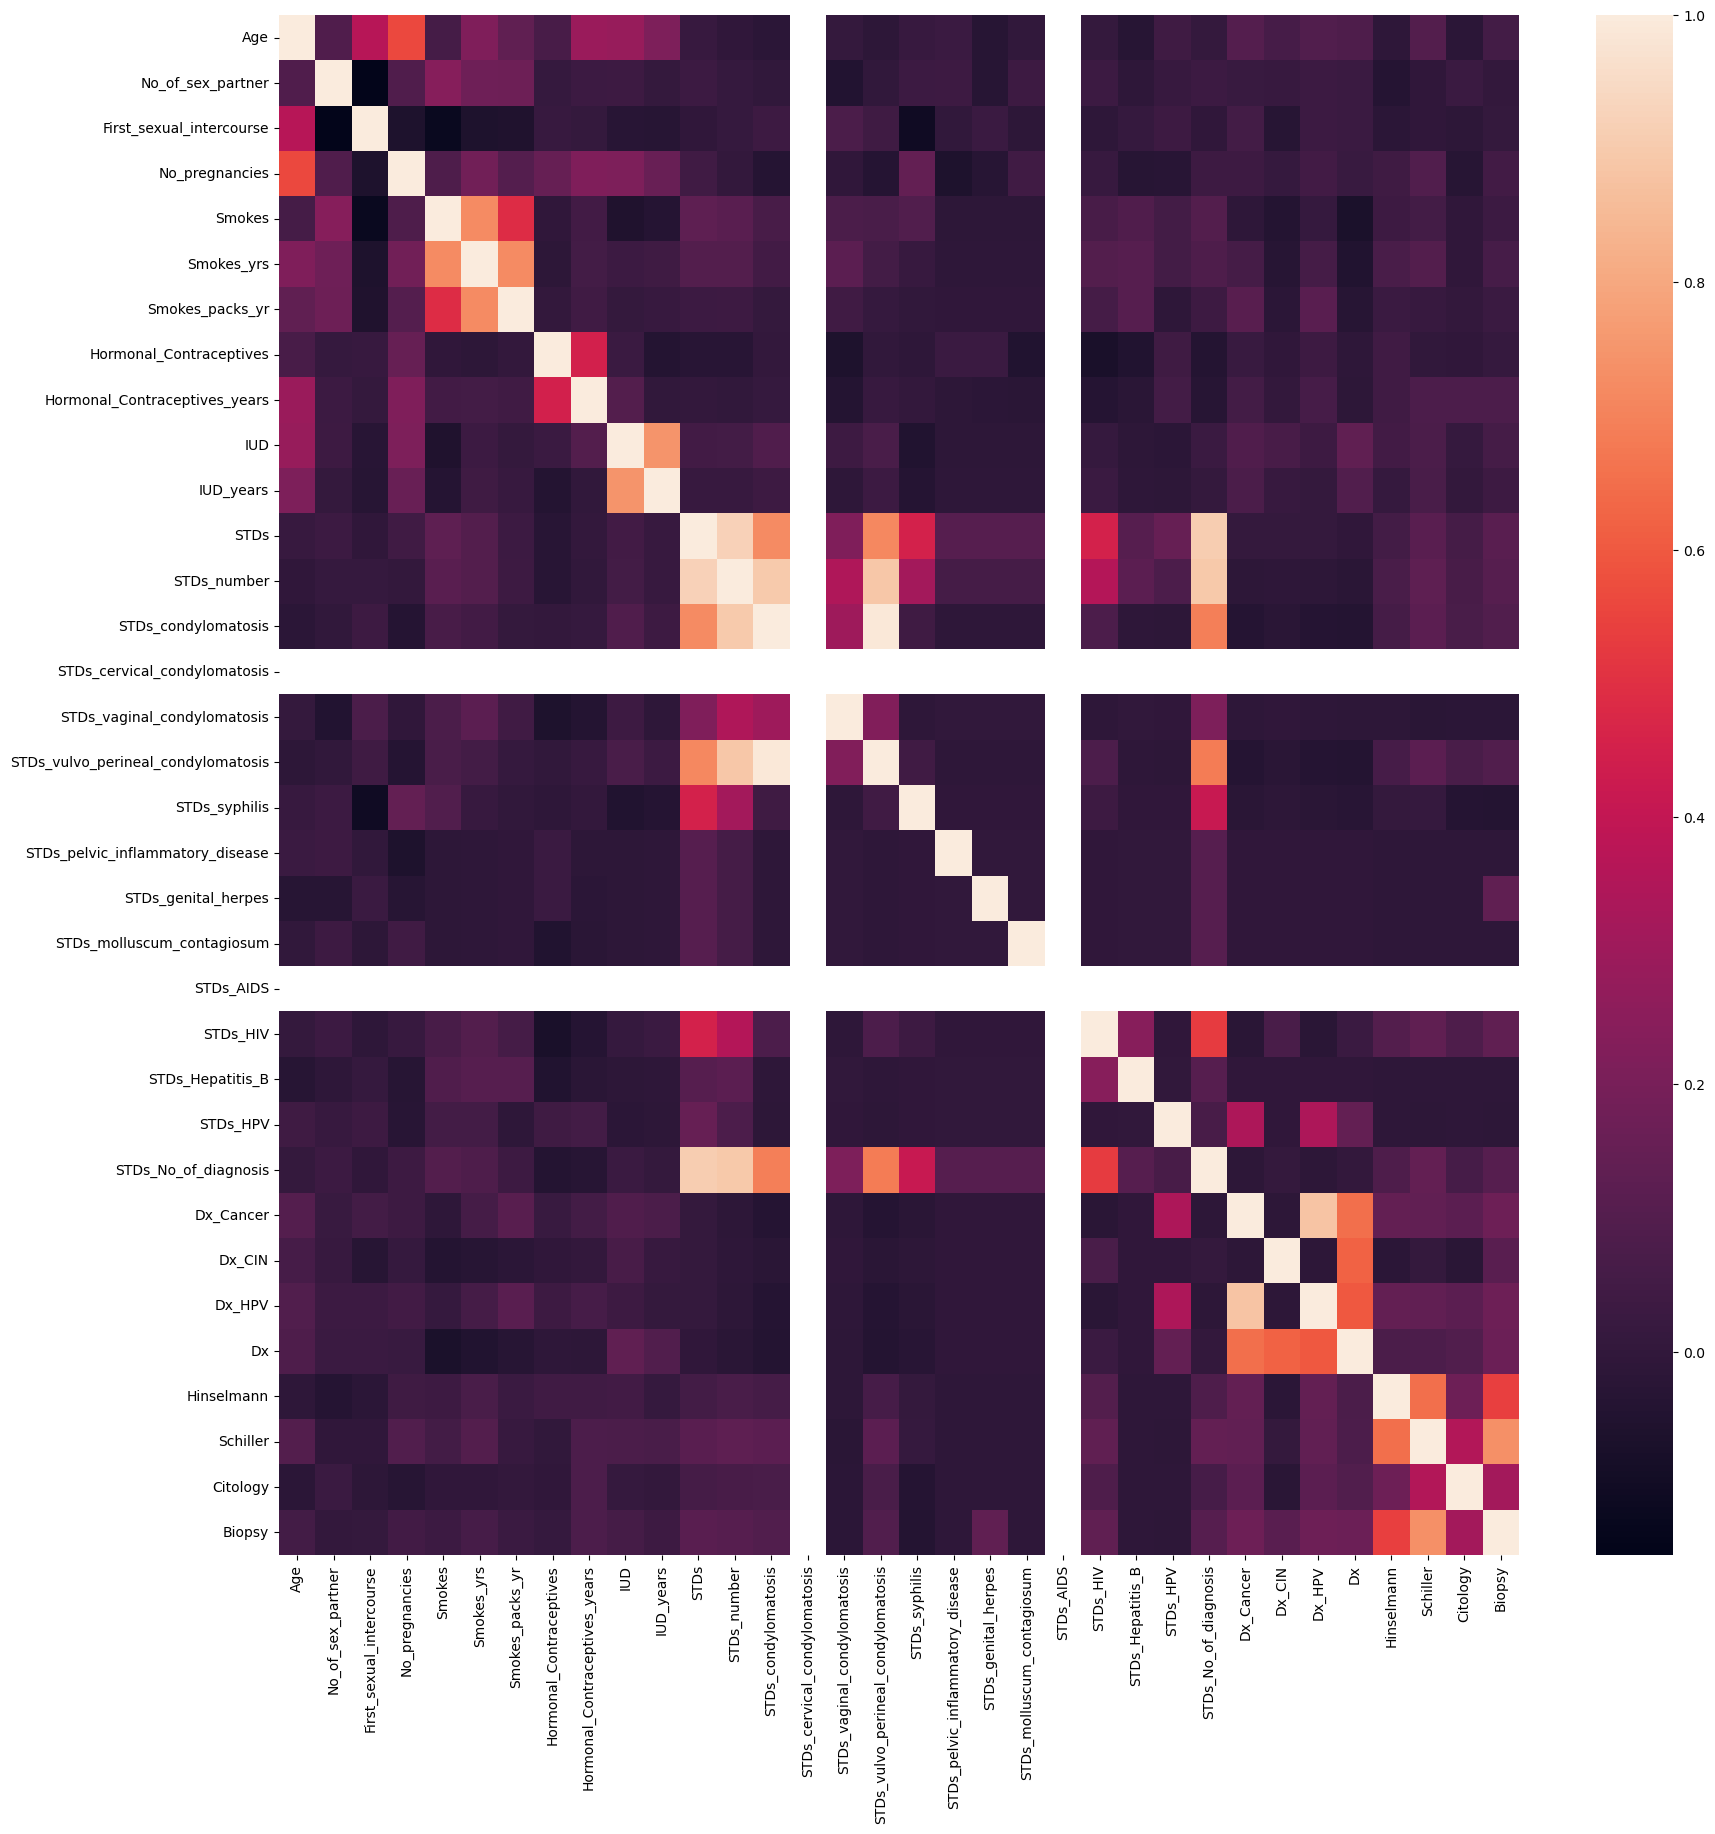

In [43]:
corr_matrix = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix )

### Uni Variate Analysis

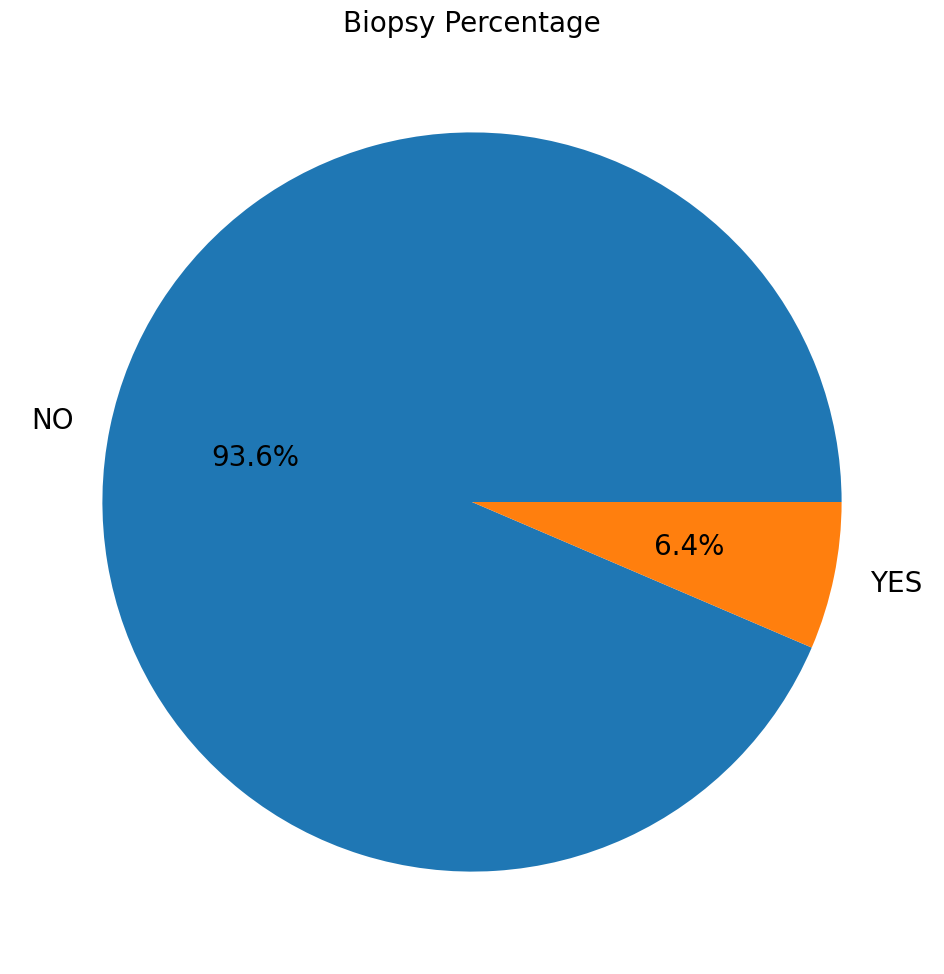

In [44]:
impute = df.copy()
impute=df.astype('float')

plt.figure(figsize = (20,12))
plt.pie(impute['Biopsy'].value_counts(), labels = ['NO', 'YES'], autopct = '%1.1f%%', labeldistance=1.1, textprops = {'fontsize': 20})
plt.title('Biopsy Percentage', fontsize=20)
plt.show()

#### Observation :
    
* So, only 6.4% of the record have positive biopsy result i.e. people having cervical cancer.
* Hence there is a imbalance in the data which needs to taken care in model building section.

Count Plots of Categorical Columns

****************************************************************************************************


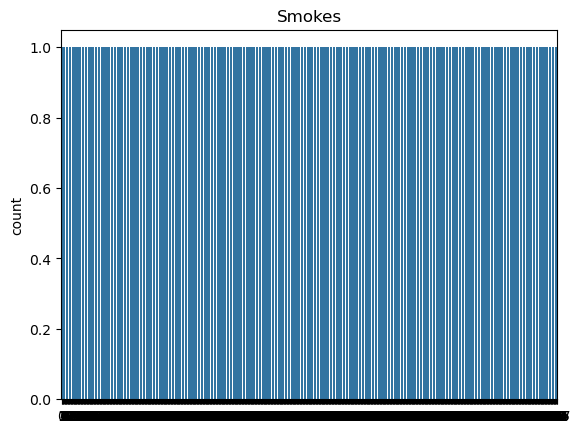

****************************************************************************************************


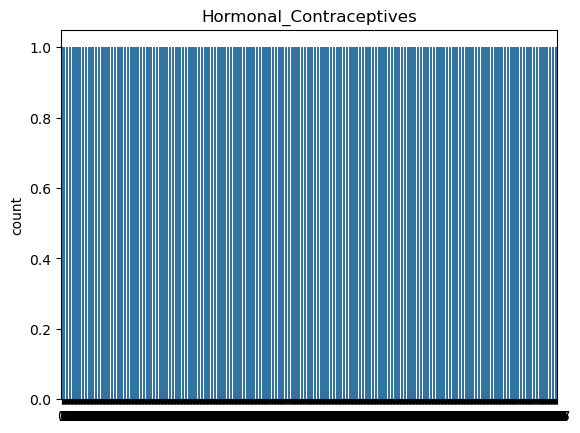

****************************************************************************************************


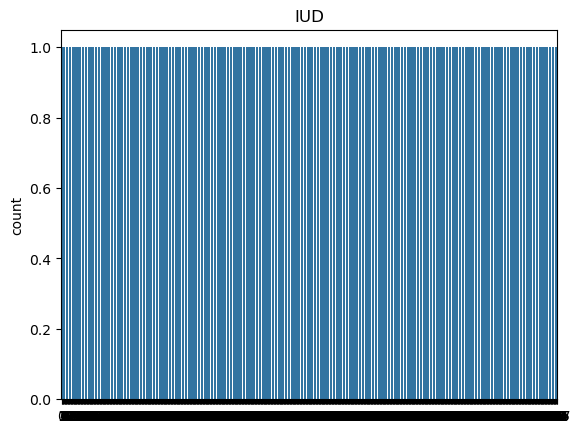

****************************************************************************************************


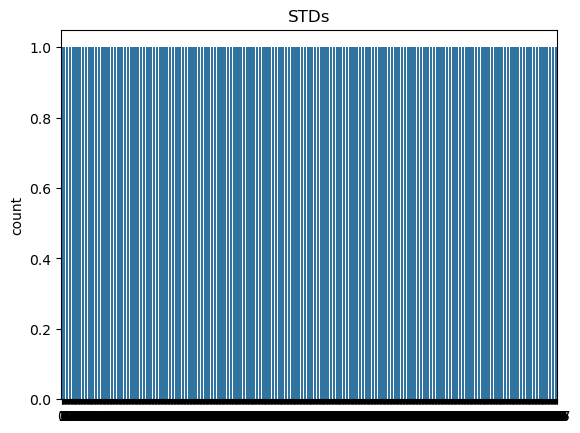

****************************************************************************************************


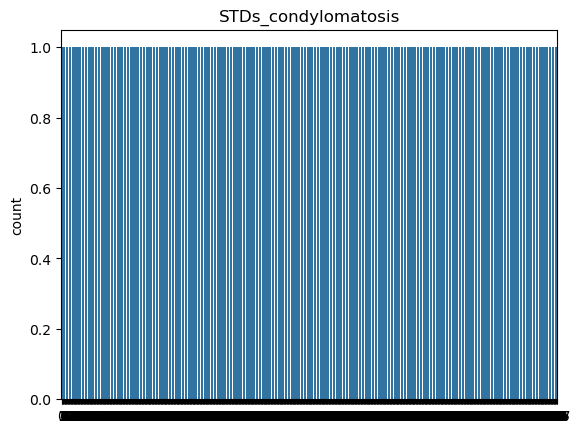

****************************************************************************************************


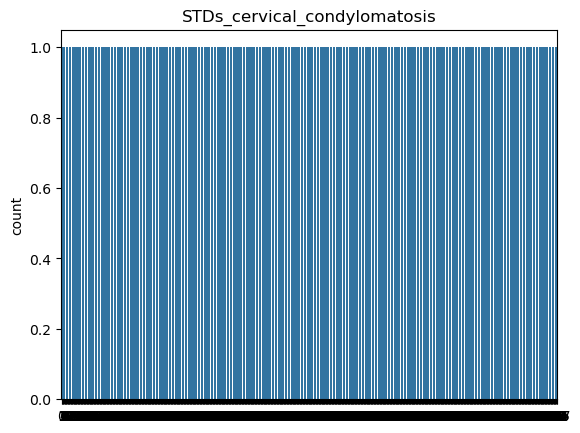

****************************************************************************************************


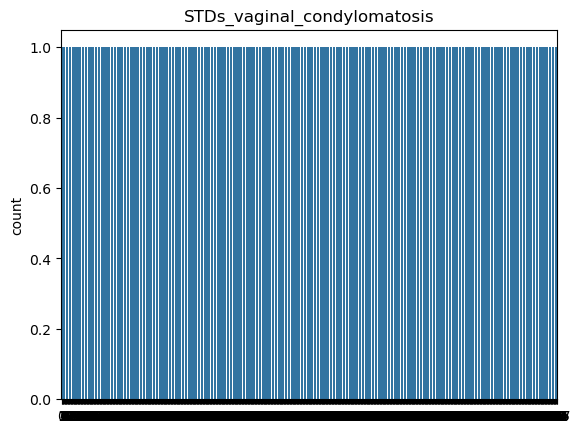

****************************************************************************************************


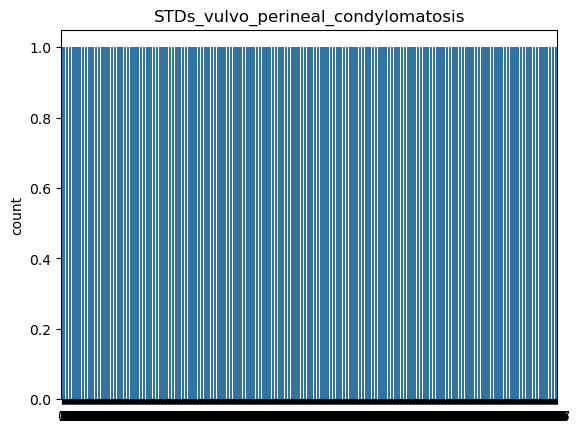

****************************************************************************************************


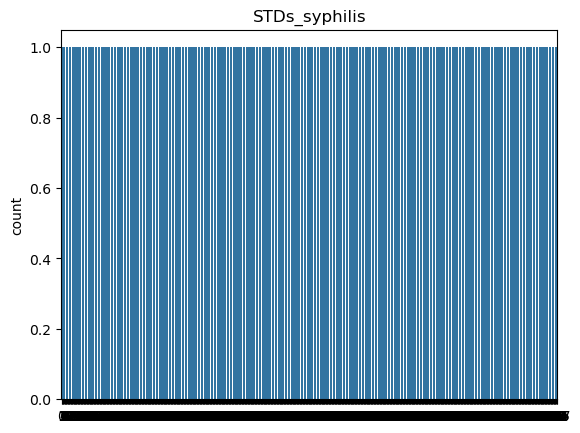

****************************************************************************************************


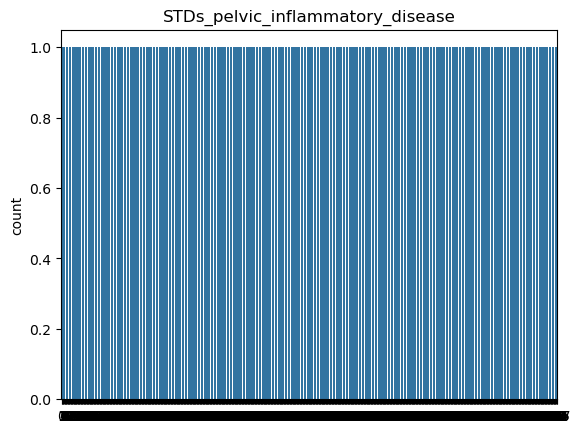

****************************************************************************************************


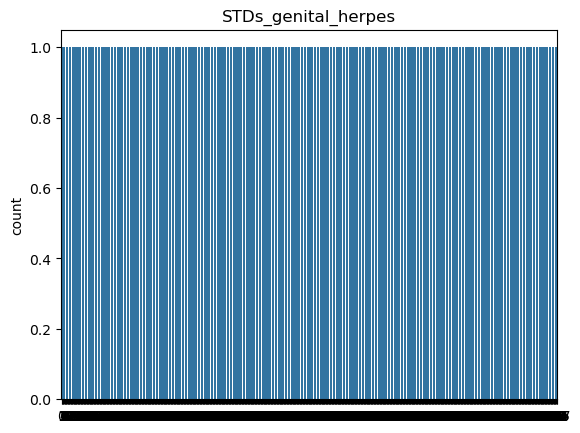

****************************************************************************************************


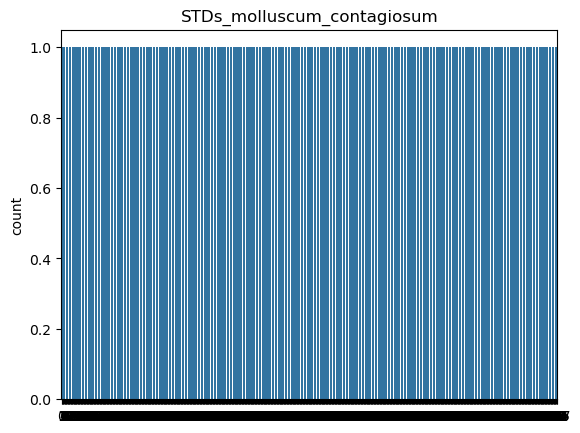

****************************************************************************************************


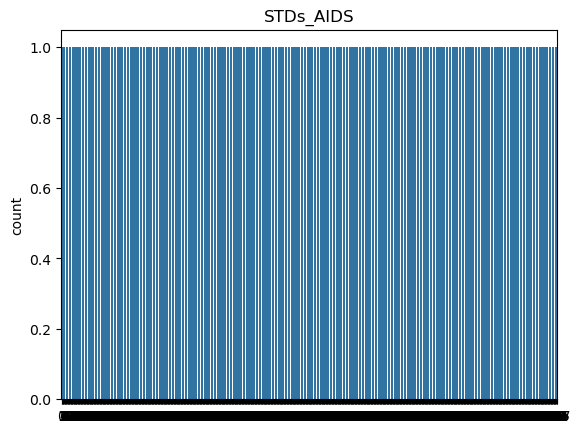

****************************************************************************************************


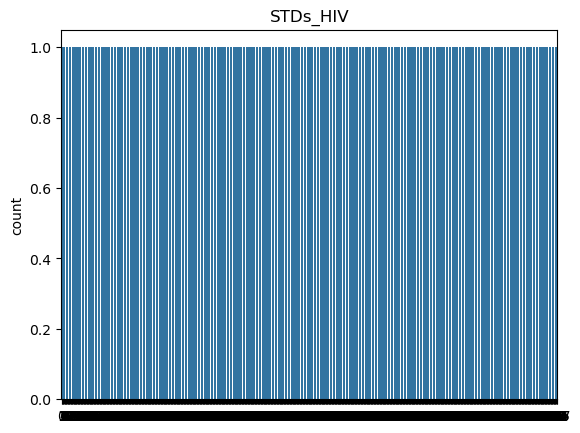

****************************************************************************************************


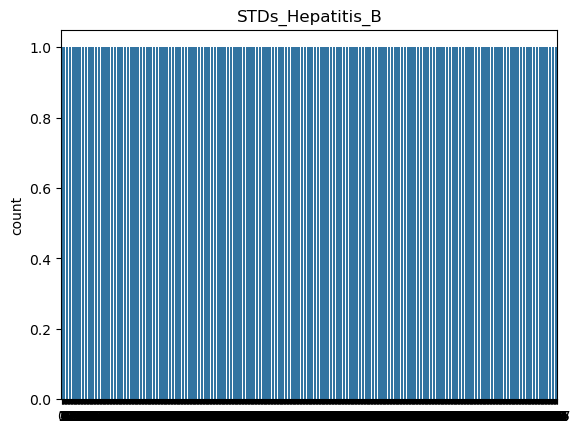

****************************************************************************************************


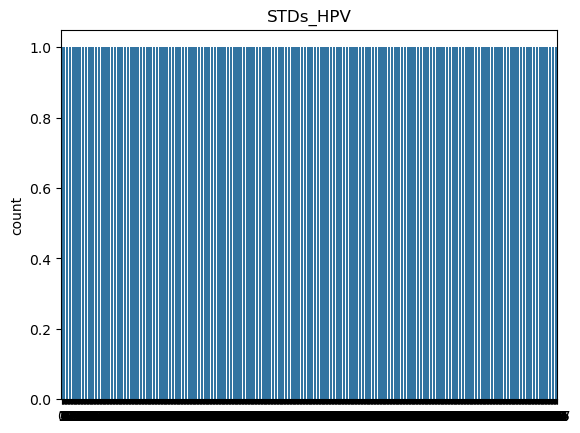

****************************************************************************************************


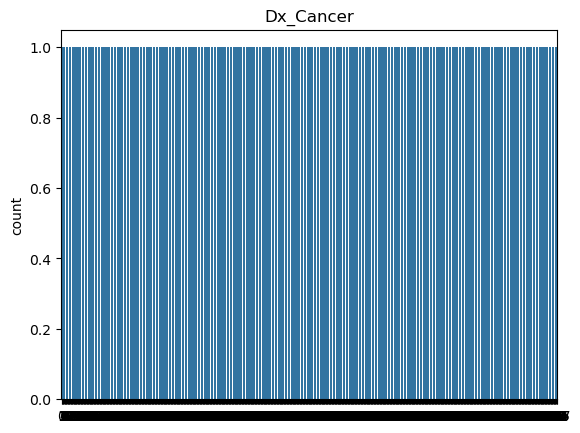

****************************************************************************************************


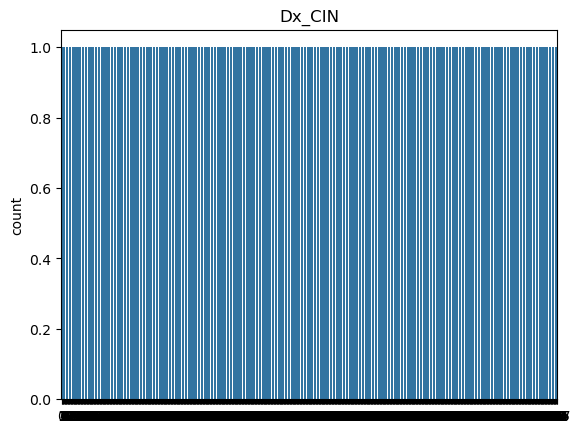

****************************************************************************************************


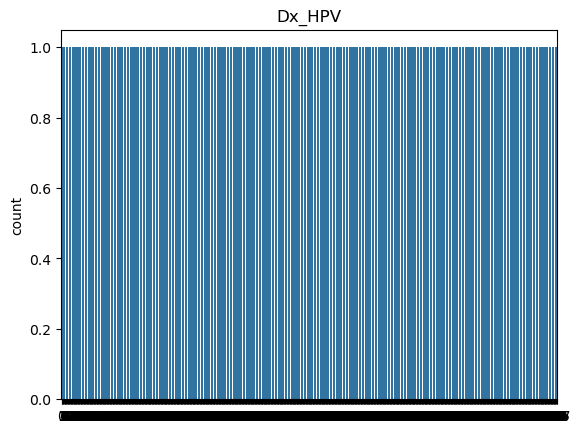

****************************************************************************************************


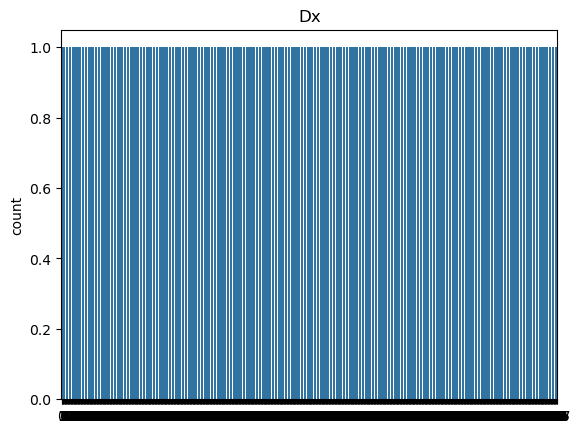

****************************************************************************************************


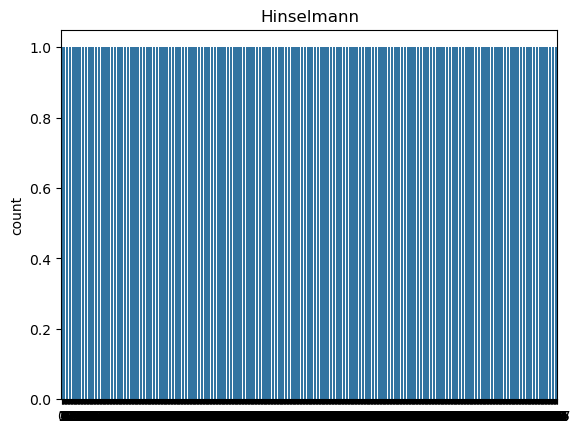

****************************************************************************************************


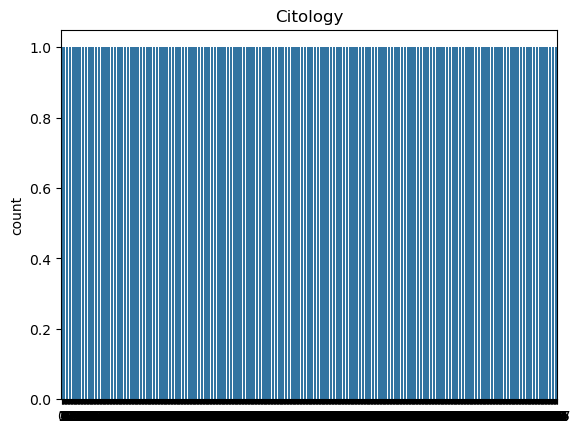

****************************************************************************************************


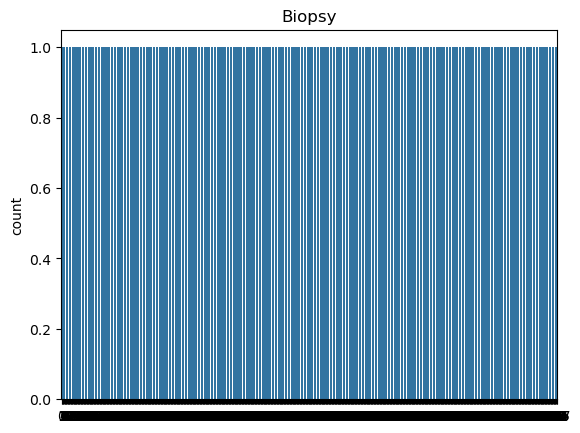

In [45]:
print("Count Plots of Categorical Columns");print()
for i in impute[x_features_categorical]:
        print('*'*100)
        sns.countplot(impute[i])
        plt.title(i)
        plt.show()

Density Plots

****************************************************************************************************


C:\Users\sneha yadav\AppData\Local\Temp\ipykernel_12516\1844464225.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(impute[i])


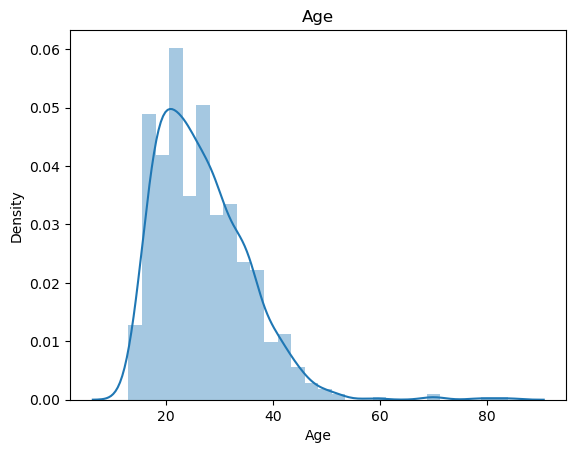

****************************************************************************************************


C:\Users\sneha yadav\AppData\Local\Temp\ipykernel_12516\1844464225.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(impute[i])


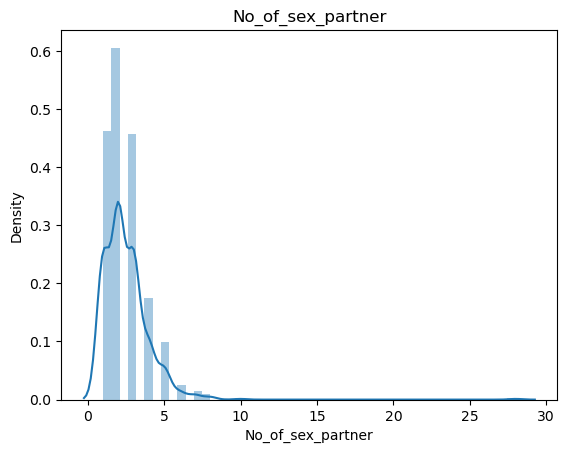

****************************************************************************************************


C:\Users\sneha yadav\AppData\Local\Temp\ipykernel_12516\1844464225.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(impute[i])


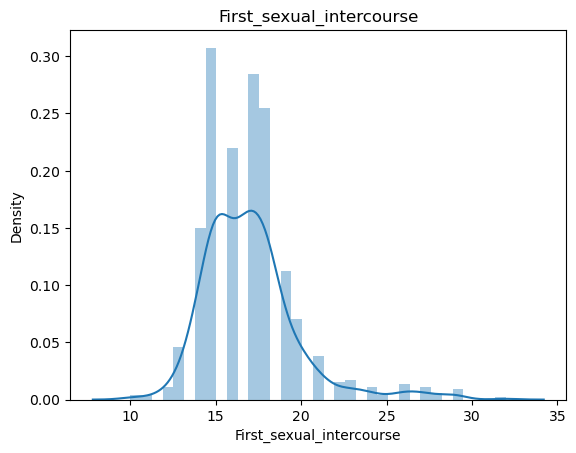

****************************************************************************************************


C:\Users\sneha yadav\AppData\Local\Temp\ipykernel_12516\1844464225.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(impute[i])


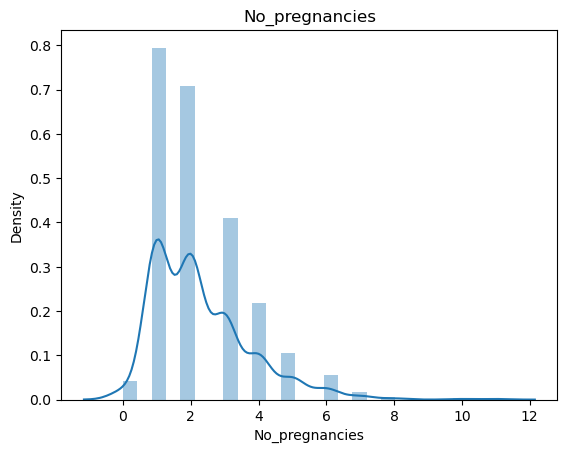

****************************************************************************************************


C:\Users\sneha yadav\AppData\Local\Temp\ipykernel_12516\1844464225.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(impute[i])


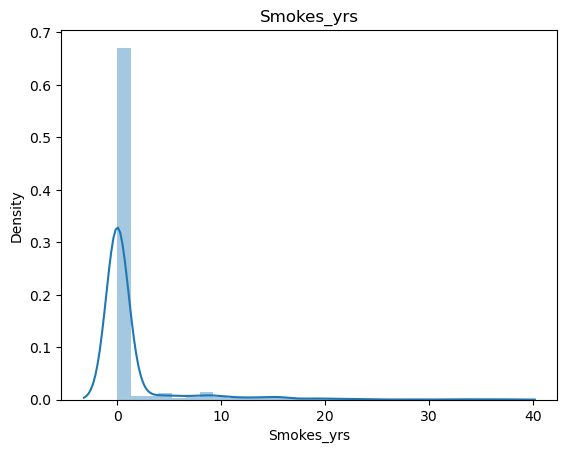

****************************************************************************************************


C:\Users\sneha yadav\AppData\Local\Temp\ipykernel_12516\1844464225.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(impute[i])


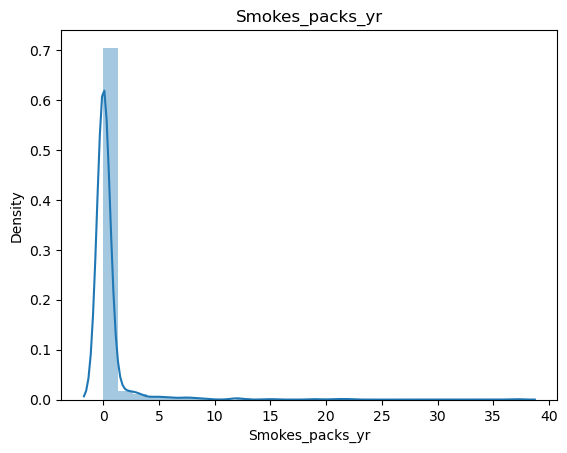

****************************************************************************************************


C:\Users\sneha yadav\AppData\Local\Temp\ipykernel_12516\1844464225.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(impute[i])


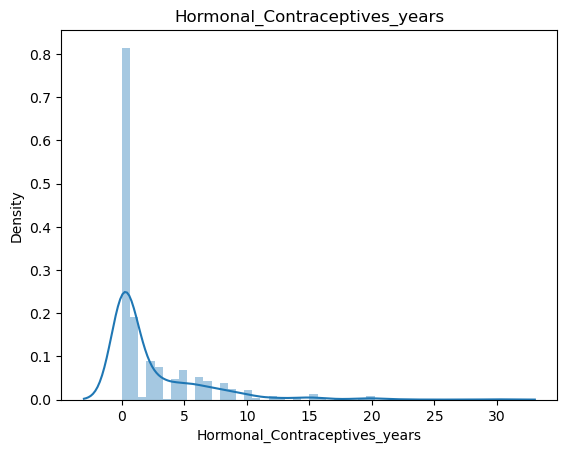

****************************************************************************************************


C:\Users\sneha yadav\AppData\Local\Temp\ipykernel_12516\1844464225.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(impute[i])


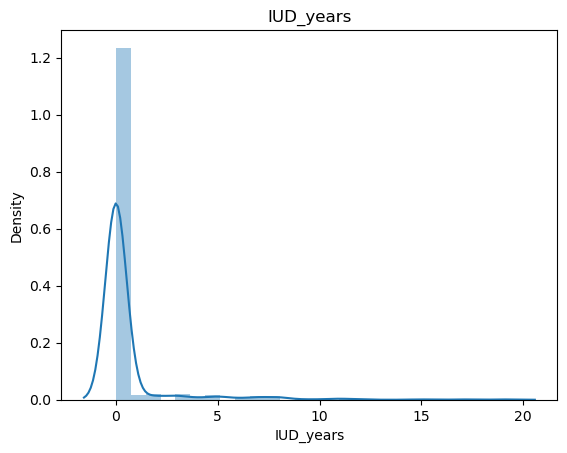

****************************************************************************************************


C:\Users\sneha yadav\AppData\Local\Temp\ipykernel_12516\1844464225.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(impute[i])


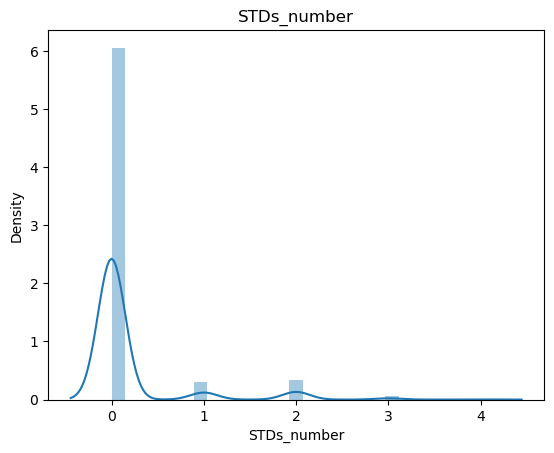

****************************************************************************************************


C:\Users\sneha yadav\AppData\Local\Temp\ipykernel_12516\1844464225.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(impute[i])


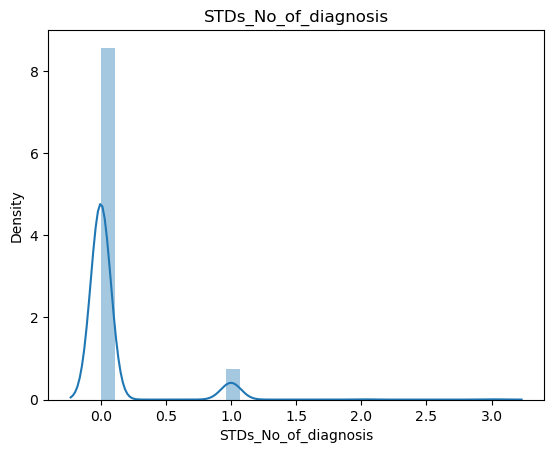

****************************************************************************************************


C:\Users\sneha yadav\AppData\Local\Temp\ipykernel_12516\1844464225.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(impute[i])


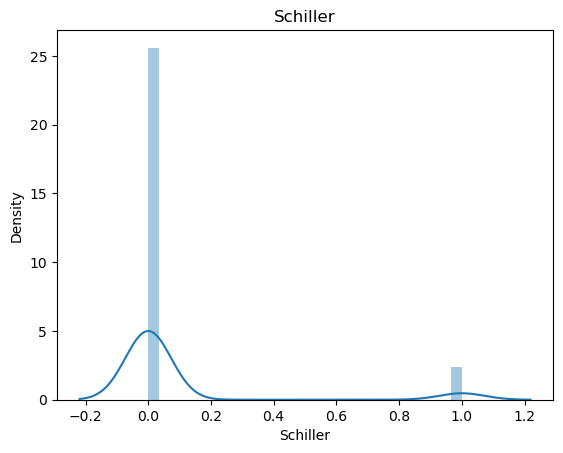

In [46]:
print("Density Plots");print()
for i in impute[x_features_numerical]:
        print('*'*100)
        sns.distplot(impute[i])
        plt.title(i)
        plt.show()

### Inference :
    
* Most of the patients are in the age group 20 -40.
    
* We have just grouped the overall features  as :
        
    1. Sexual habits attributes
    2. Smoking habits attributes
    3. Birth control attributes
    4. STD attributes
    
#### Smoking Habits :
* Relatively larger proportion of the patients are non smokers (around 700) and only a very few (around 100) are smokers.
  
#### Sexual Habits :
* Predominant of the patients had 0 -5  sexual partners.
* Most of them had their first sexual intercourse between 15 - 20 years.
* The larger group of patient had 1 -3 pregancies overall in their life.
       
#### Birth Control Habits :
* Most of the patients have used Hormonal contraceptives methods like pills and medications for birth controls where only a few of them have opted for intrauterine devices (IUDs). The reason for this is may be that hormonal contraceptives are readily available in shops (needs presciption) and one can take those at their home on their own with some sort of guidance where as IUD needs an doctor supervision and the patient needs to be in hospital.
* Generally most patients have used birth control methods only for less than 2 years while very few of them have used  more than 2 years.
        
#### Sexually Transmitted Diseases :
* The countplot above depicts that only a very very people are affected by any one of the STDs.
* So clearly there's an imbalance here and hence we can suggest that the STD attributes may have significant role while building the models.
 
     


## Multivariate Analysis 

In [47]:
impute[x_features_categorical]=impute[x_features_categorical].replace(0,'no')
impute[x_features_categorical]=impute[x_features_categorical].replace(1,'yes')

impute.Smokes_yrs=impute.Smokes_yrs.astype('float64')
impute.IUD_years=impute.IUD_years.astype('float64')
impute.Smokes_packs_yr=impute.Smokes_packs_yr.astype('float64')
impute['smokes_yr_cat']=pd.cut(impute.Smokes_yrs,[-1,2,5,10,15,20,25,50],labels=['<2','2-5','5-10','10-15','15-20','20-25','>25'])
impute=impute.drop(['Smokes_yrs'],axis=1)
#bins are created based on specified ranges of values
impute['smokepack_yr_cat']=pd.cut(impute.Smokes_packs_yr,[-1,2,5,10,20,50],labels=['<2','2-5','5-10','10-20','>20'])
impute=impute.drop(['Smokes_packs_yr'],axis=1)
impute['IUD_years_bin']=pd.cut(impute.IUD_years,[-1,2,4,6,8,10,15,20],labels=['<2','2-4','4-6','6-8','8-10','10-15','>15'])
impute=impute.drop(['IUD_years'],axis=1)
impute['Hormonal_years_bin']=pd.cut(impute.Hormonal_Contraceptives_years,[-1,2,4,6,8,10,15,20],labels=['<2','2-4','4-6','6-8','8-10','10-15','>15'])

### i) Age and Sexual Habits vs Biopsy

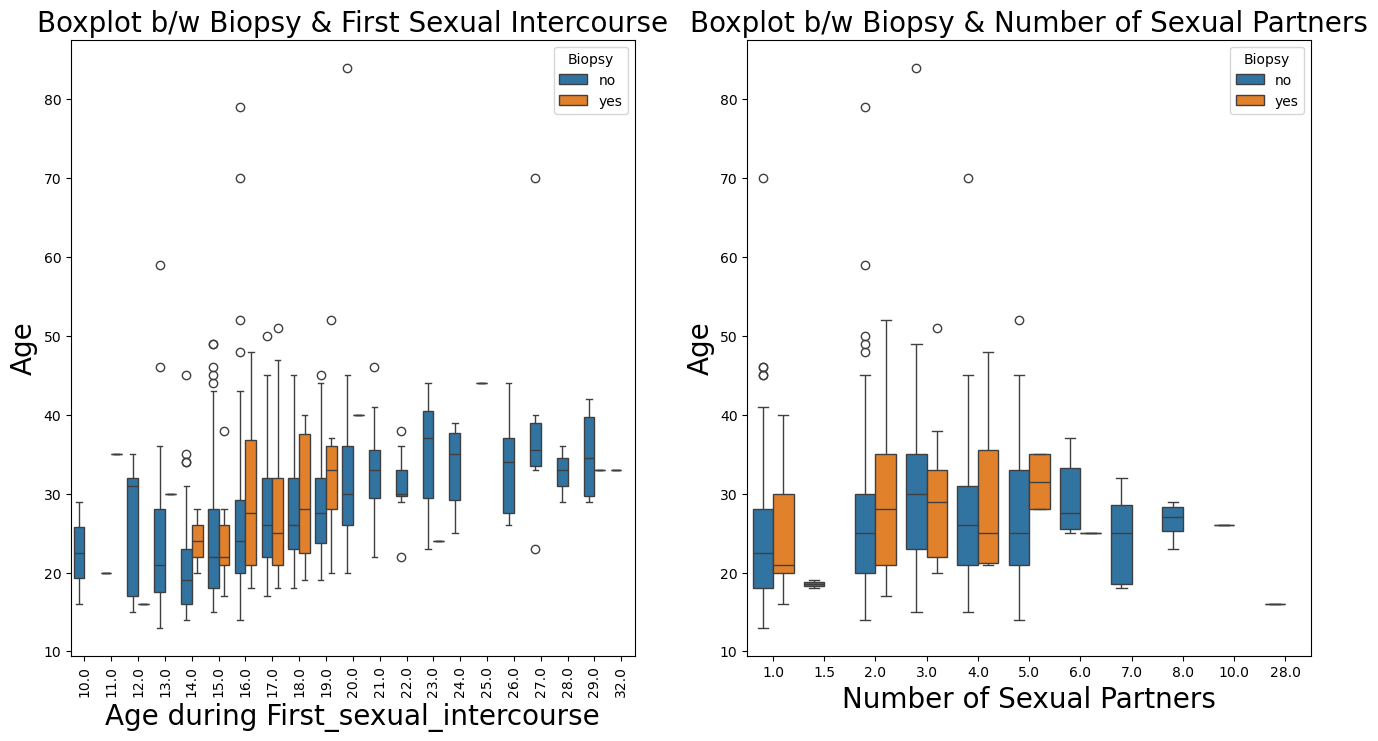

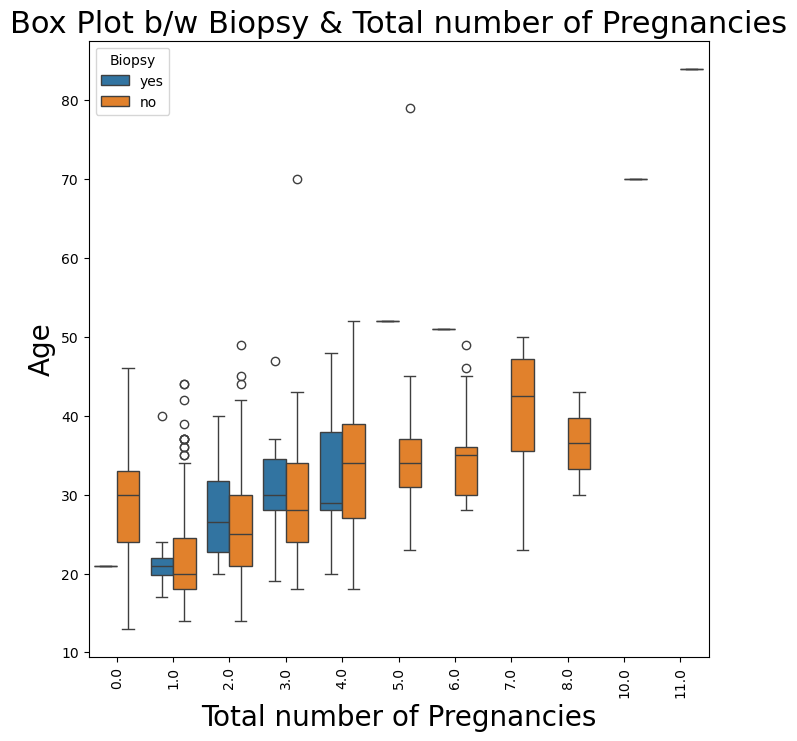

In [48]:
plt.subplots(1,2,figsize=(16,8))
plt.subplot(1,2,1)
a=sns.boxplot(x=impute['First_sexual_intercourse'],y=impute['Age'], hue=impute['Biopsy'])
a.axes.set_title("Boxplot b/w Biopsy & First Sexual Intercourse",fontsize=20)
a.set_xlabel("Age during First_sexual_intercourse",fontsize=20)
a.set_ylabel("Age",fontsize=20)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Boxplot b/w Biopsy & Number of Sexual Partners',fontsize=20)
a=sns.boxplot(x=impute['No_of_sex_partner'],y=impute['Age'], hue=impute['Biopsy'])
a.set_xlabel("Number of Sexual Partners",fontsize=20)
a.set_ylabel("Age",fontsize=20)
plt.show()
plt.figure(figsize=(8,8))
a=sns.boxplot(x=impute['No_pregnancies'],y=impute['Age'], hue=impute['Biopsy'])
a.axes.set_title("Box Plot b/w Biopsy & Total number of Pregnancies",fontsize=22)
a.set_xlabel('Total number of Pregnancies',fontsize=20)
plt.xticks(rotation=90)
a.set_ylabel("Age",fontsize=20)
plt.show()

##### Inferences :

* Those who had their first sexual intercourse in between 15 and 18 years of their life are more prone to be tested positive with Biopsy test and those people are predominantly in the age group of 20 to 35.
* The persons who have sexual partners between 1 & 3 are more prone to be testes as positive in Biopsy test and they are predominantly in the age group of 20 to 35.
* Higher the number of pregancies, higher the chances of getting positive Biopsy test.

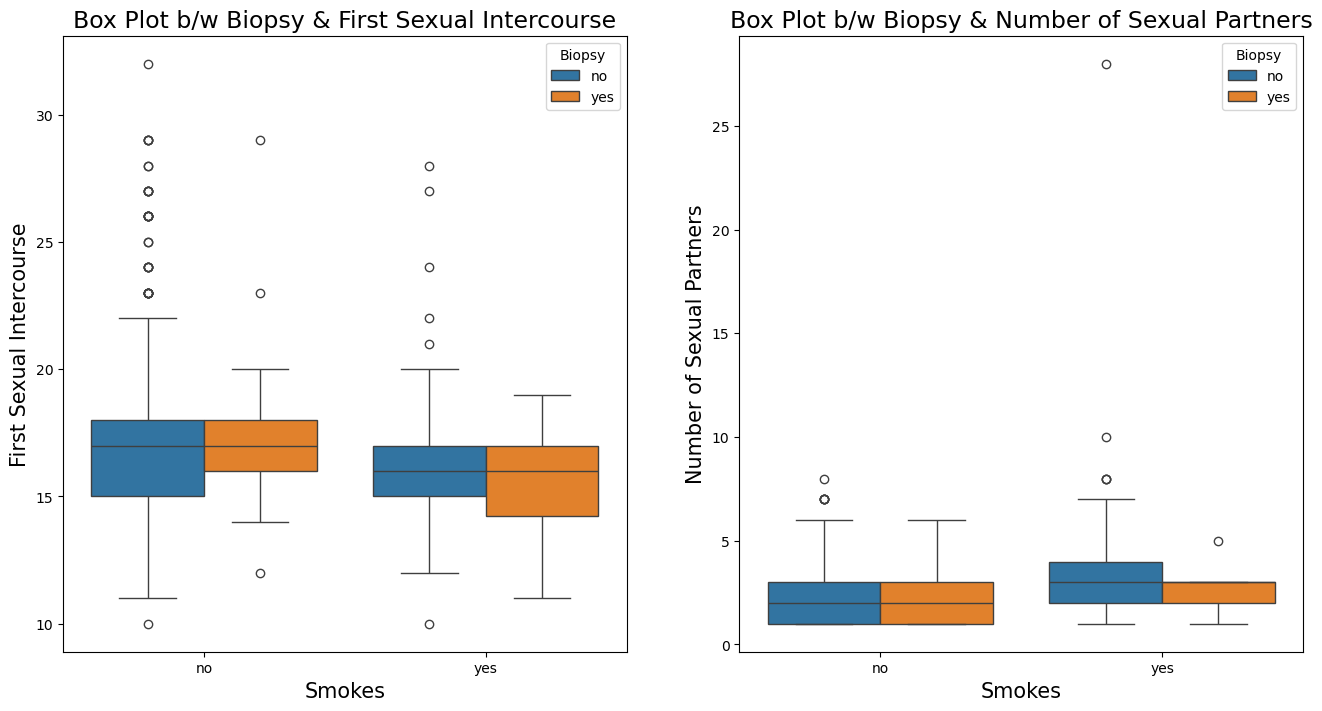

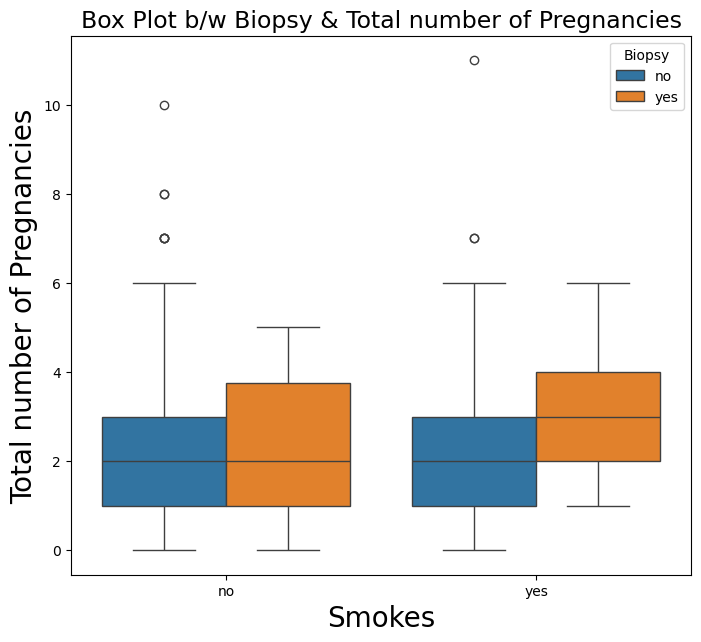

In [49]:
plt.subplots(1,2,figsize=(16,8))
plt.subplot(1,2,1)
a=sns.boxplot(y=impute['First_sexual_intercourse'],hue=impute['Biopsy'],x=impute['Smokes'])
a.axes.set_title("Box Plot b/w Biopsy & First Sexual Intercourse",fontsize=17)
a.set_xlabel("Smokes",fontsize=15)
a.set_ylabel("First Sexual Intercourse",fontsize=15)
plt.subplot(1,2,2)
plt.title('Box Plot b/w Biopsy & Number of Sexual Partners',fontsize=17)
a=sns.boxplot(y=impute['No_of_sex_partner'],hue=impute['Biopsy'],x=impute['Smokes'])
a.set_xlabel("Smokes",fontsize=15)
a.set_ylabel("Number of Sexual Partners",fontsize=15)
plt.figure(figsize=(8,7))
a=sns.boxplot(y=impute['No_pregnancies'],hue=impute['Biopsy'],x=impute['Smokes'])
a.axes.set_title("Box Plot b/w Biopsy & Total number of Pregnancies",fontsize=17)
a.set_xlabel('Smokes',fontsize=20)
a.set_ylabel("Total number of Pregnancies",fontsize=20)
plt.show()

##### Inference :

* Those who smoke and had their first sexual intercourse in younger age between 15yrs and 18yrs are more prone to be test as Positive in Biopsy test.
* There is no clear relation between smoking and number of sex partners as the smoking cancer patients and non smoking patients, both have nearly same number of sex partners.
* The person who smokes and have higher number of pregnancies are more prone to be tested as positive in Biopsy test.

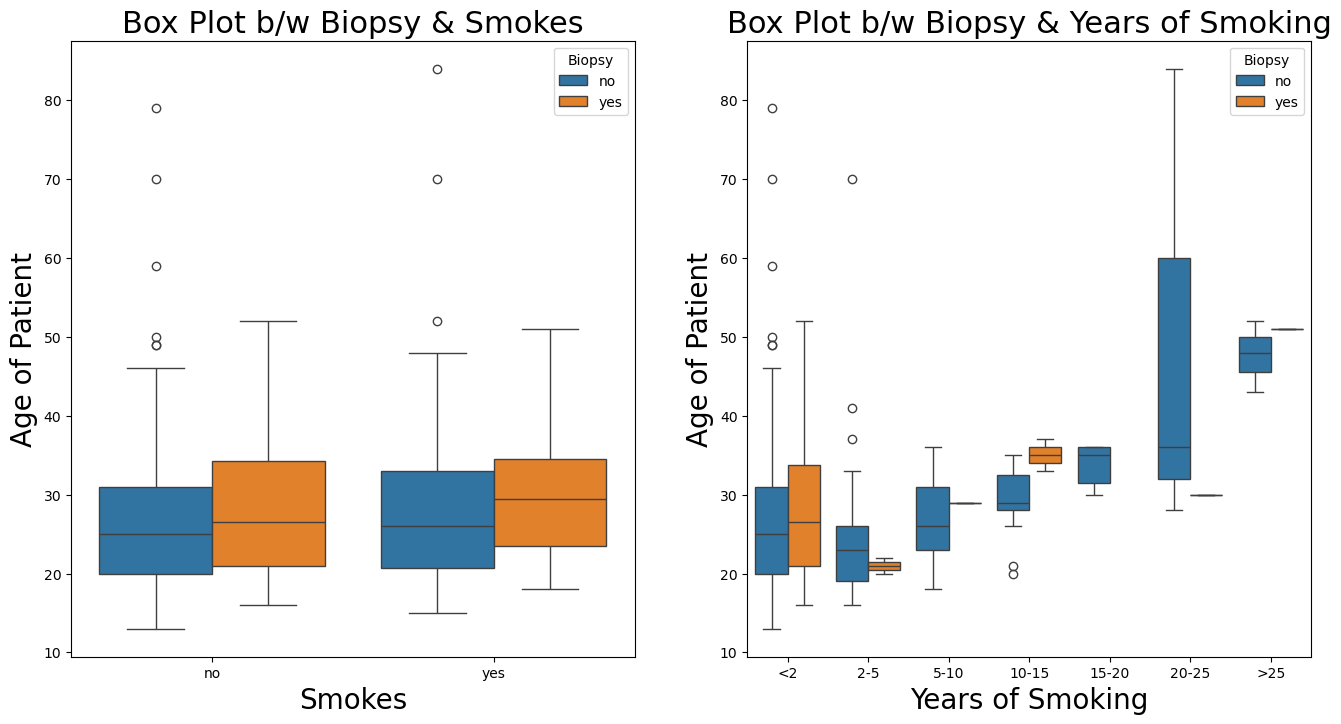

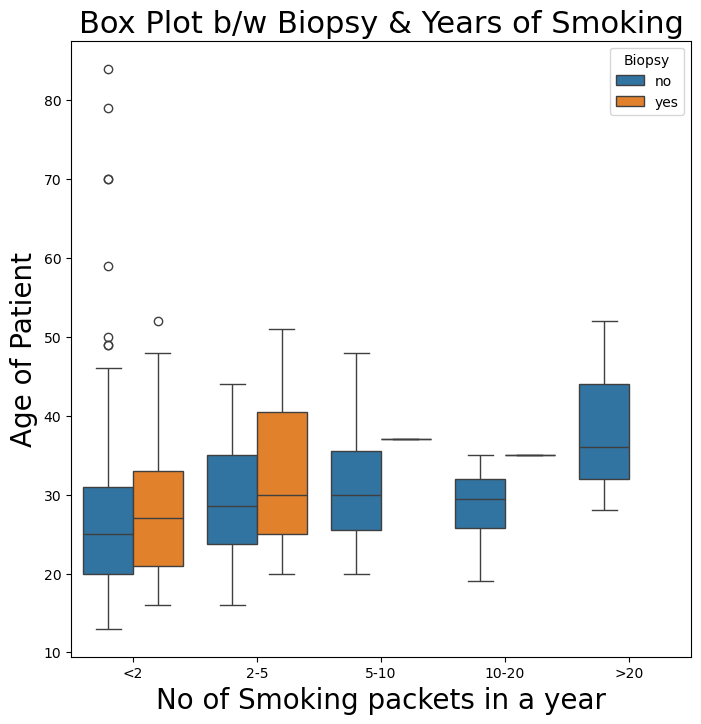

In [50]:
plt.subplots(1,2,figsize=(16,8))
plt.subplot(1,2,1)
b=sns.boxplot(hue=impute['Biopsy'],x=impute['Smokes'],y=impute['Age'])
b.axes.set_title("Box Plot b/w Biopsy & Smokes",fontsize=22)
b.set_xlabel("Smokes",fontsize=20)
b.set_ylabel("Age of Patient",fontsize=20)
plt.subplot(1,2,2)
b=sns.boxplot(hue=impute['Biopsy'],x=impute['smokes_yr_cat'],y=impute['Age'])
b.axes.set_title("Box Plot b/w Biopsy & Years of Smoking",fontsize=22)
b.set_xlabel("Years of Smoking",fontsize=20)
b.set_ylabel("Age of Patient",fontsize=20)
plt.show()
plt.figure(figsize=(8,8))
b=sns.boxplot(hue=impute['Biopsy'],x=impute['smokepack_yr_cat'],y=impute['Age'])
b.axes.set_title("Box Plot b/w Biopsy & Years of Smoking",fontsize=22)
b.set_xlabel("No of Smoking packets in a year",fontsize=20)
b.set_ylabel("Age of Patient",fontsize=20)
plt.show()

##### Inferences :

*  Cancer can affect to non-smokers as well and even in the young age (around 22 years) and the average age of Smoking cancer patients are higher than those of non smoking cancer patients. So the smoking people who are aged high are more prone to be test as positive.
* The person who has smoked for atleast one year are more prone to be test as positive in Biopsy test
* The person who are aged high and smoke more number of packets a year are prone to be tested as postive in Biopsy test

<Axes: xlabel='count', ylabel='IUD_years_bin'>

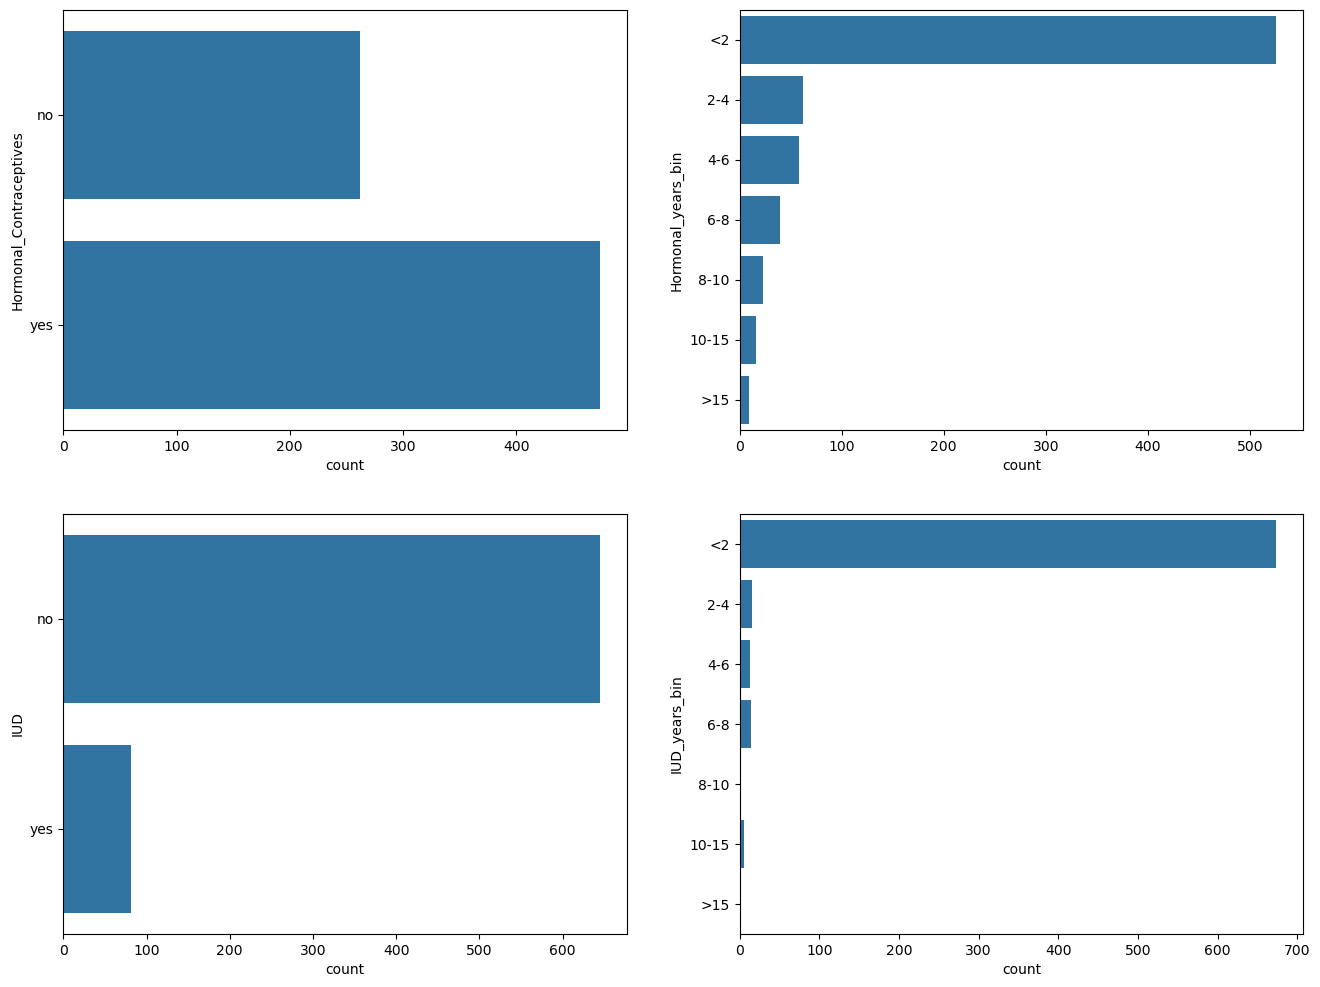

In [51]:
plt.subplots(2,2,figsize=(16,12))
plt.subplot(2,2,1)
sns.countplot(impute['Hormonal_Contraceptives'])
plt.subplot(2,2,2)
sns.countplot(impute['Hormonal_years_bin'])
plt.subplot(2,2,3)
sns.countplot(impute['IUD'])
plt.subplot(2,2,4)
sns.countplot(impute['IUD_years_bin'])

##### Inferences:

* Most of the patients have used Hormonal contraceptives methods like pills and medications for birth controls where only a few of them have opted for intrauterine devices (IUDs). The reason for this is may be that hormonal contraceptives are readily available in shops (needs presciption) and one can take those at their home on their own with some sort of guidance where as IUD needs an doctor supervision and the patient needs to be in hospital.
    
* Generally most patients have used birth control methods only for less than 2 years while very few of them have used  upto 8

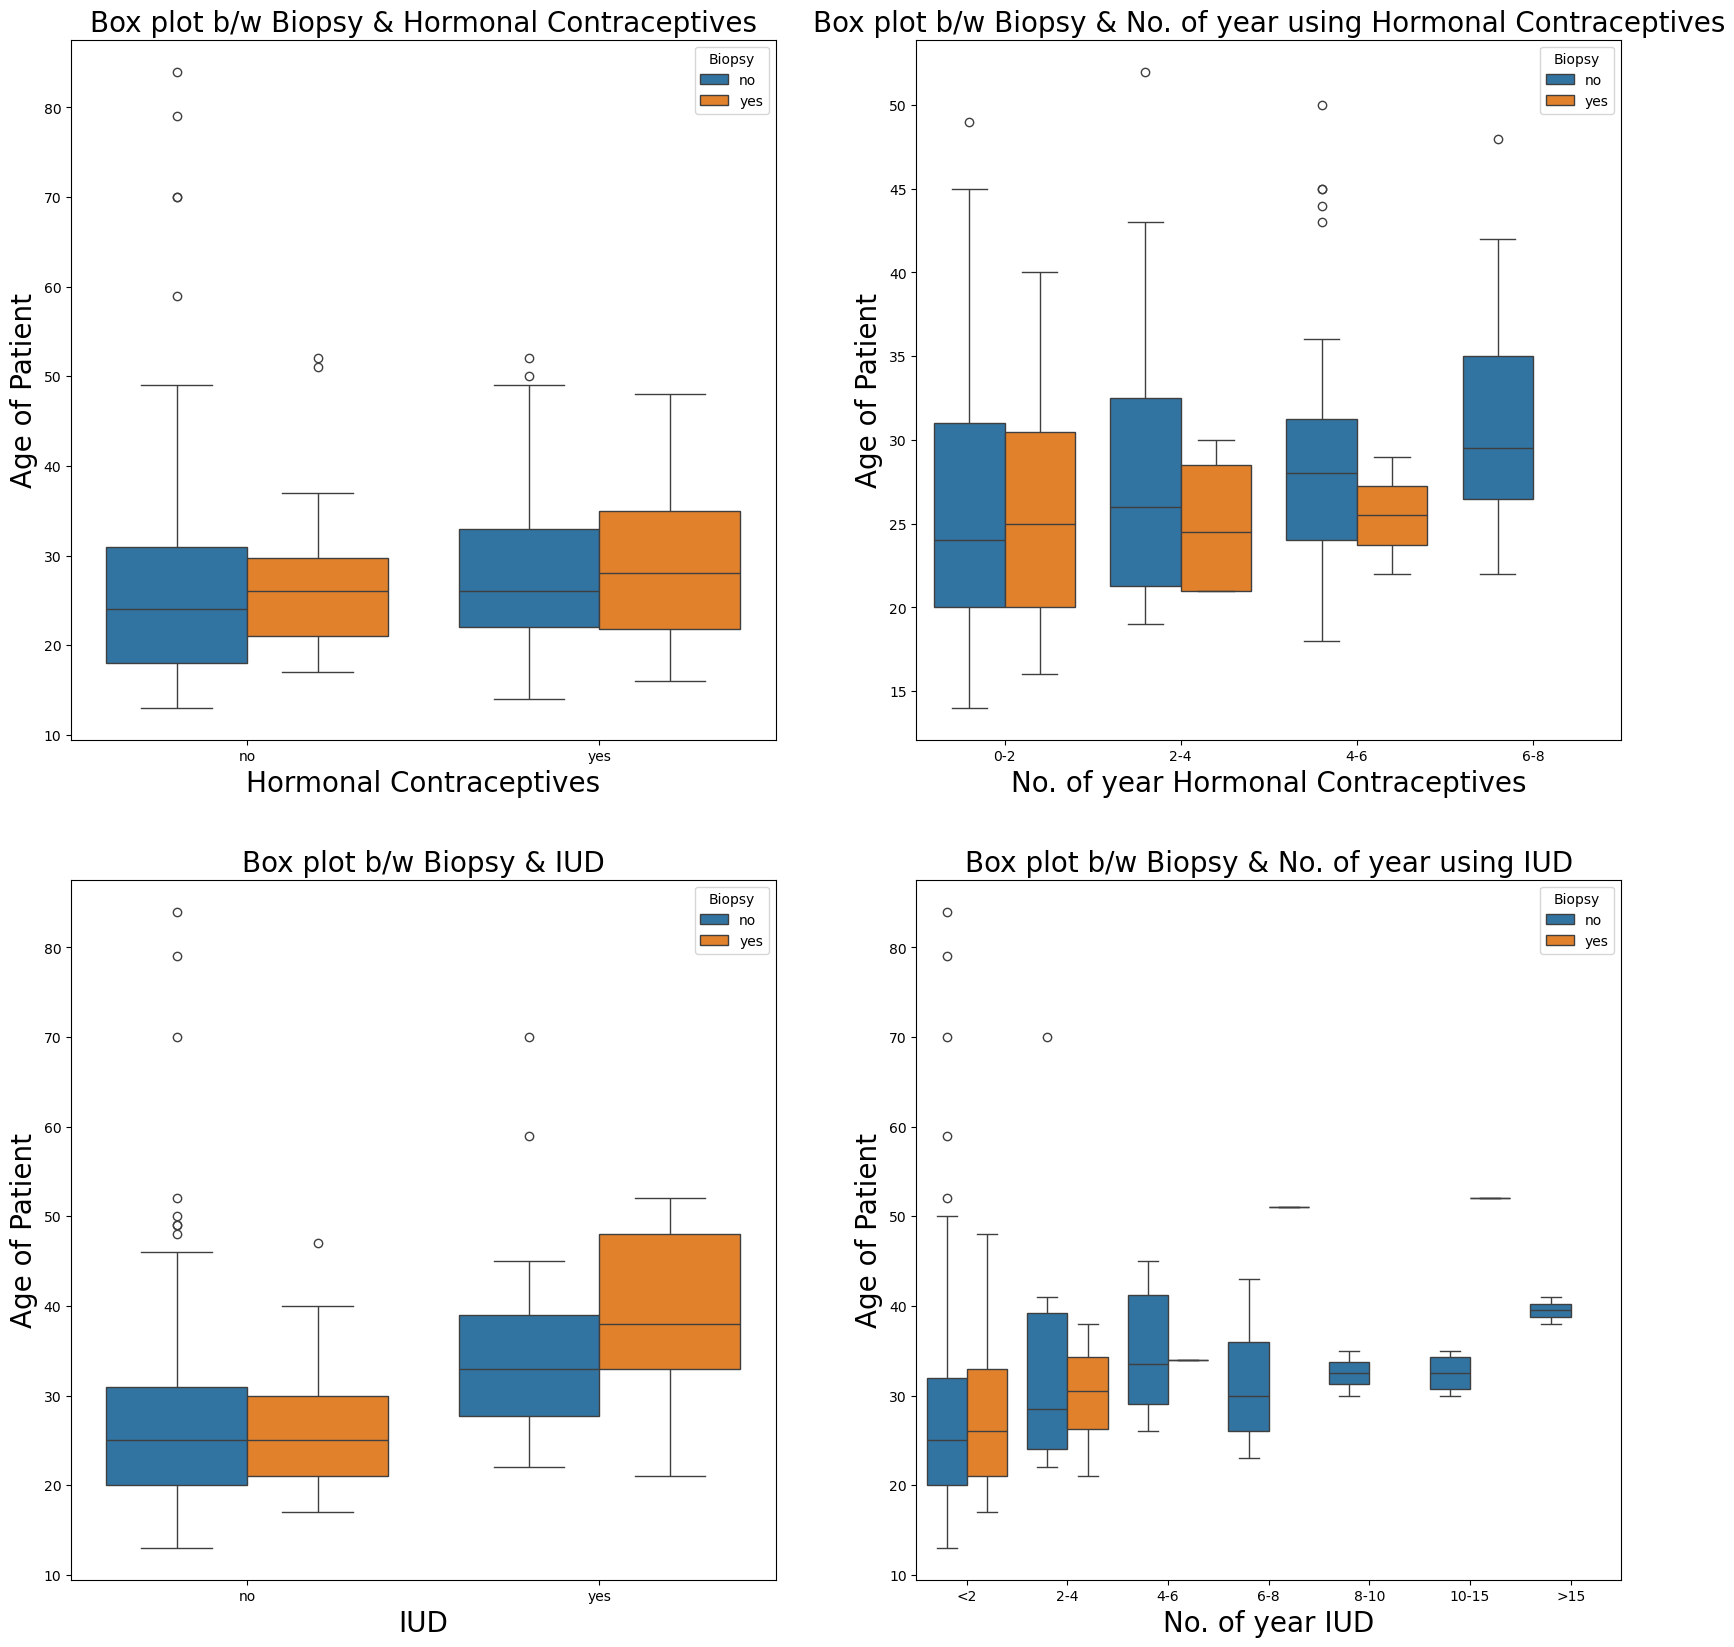

In [52]:
plt.subplots(2,2,figsize=(20,20))
plt.subplot(2,2,1)
c=sns.boxplot(hue=impute['Biopsy'],x=impute['Hormonal_Contraceptives'],y=impute['Age'])
c.axes.set_title('Box plot b/w Biopsy & Hormonal Contraceptives',fontsize=20)
c.set_xlabel('Hormonal Contraceptives',fontsize=20)
c.set_ylabel('Age of Patient',fontsize=20)
plt.subplot(2,2,2)
years=pd.cut(impute.Hormonal_Contraceptives_years,[0,2,4,6,8],labels=['0-2','2-4','4-6','6-8'])
c=sns.boxplot(x=years,y='Age',hue='Biopsy',data=impute)
c.axes.set_title('Box plot b/w Biopsy & No. of year using Hormonal Contraceptives',fontsize=20)
c.set_xlabel('No. of year Hormonal Contraceptives',fontsize=20)
c.set_ylabel('Age of Patient',fontsize=20)
plt.subplot(2,2,3)
c=sns.boxplot(hue=impute['Biopsy'],x=impute['IUD'],y=impute['Age'])
c.axes.set_title('Box plot b/w Biopsy & IUD',fontsize=20)
c.set_xlabel('IUD',fontsize=20)
c.set_ylabel('Age of Patient',fontsize=20)
plt.subplot(2,2,4)
c=sns.boxplot(x='IUD_years_bin',y='Age',hue='Biopsy',data=impute)
c.axes.set_title('Box plot b/w Biopsy & No. of year using IUD',fontsize=20)
c.set_xlabel('No. of year IUD',fontsize=20)
c.set_ylabel('Age of Patient',fontsize=20)
c=sns.boxplot()
plt.show()

##### Inferences :

* The persons who did not use the hormonal contraceptives and with more age are high in number, who show positive for Biopsy test
* The patients with 0-4 years of usage in hormonal contraceptives and the average age between 20yrs & 30yrs show positive for Biopsy test.
* The persons who did not use IUD and with lesser age between 25 years & 35 years, show positive for Biopsy test where as among those who used IUD, the higg aged people (around 40) are more prone to cancer.


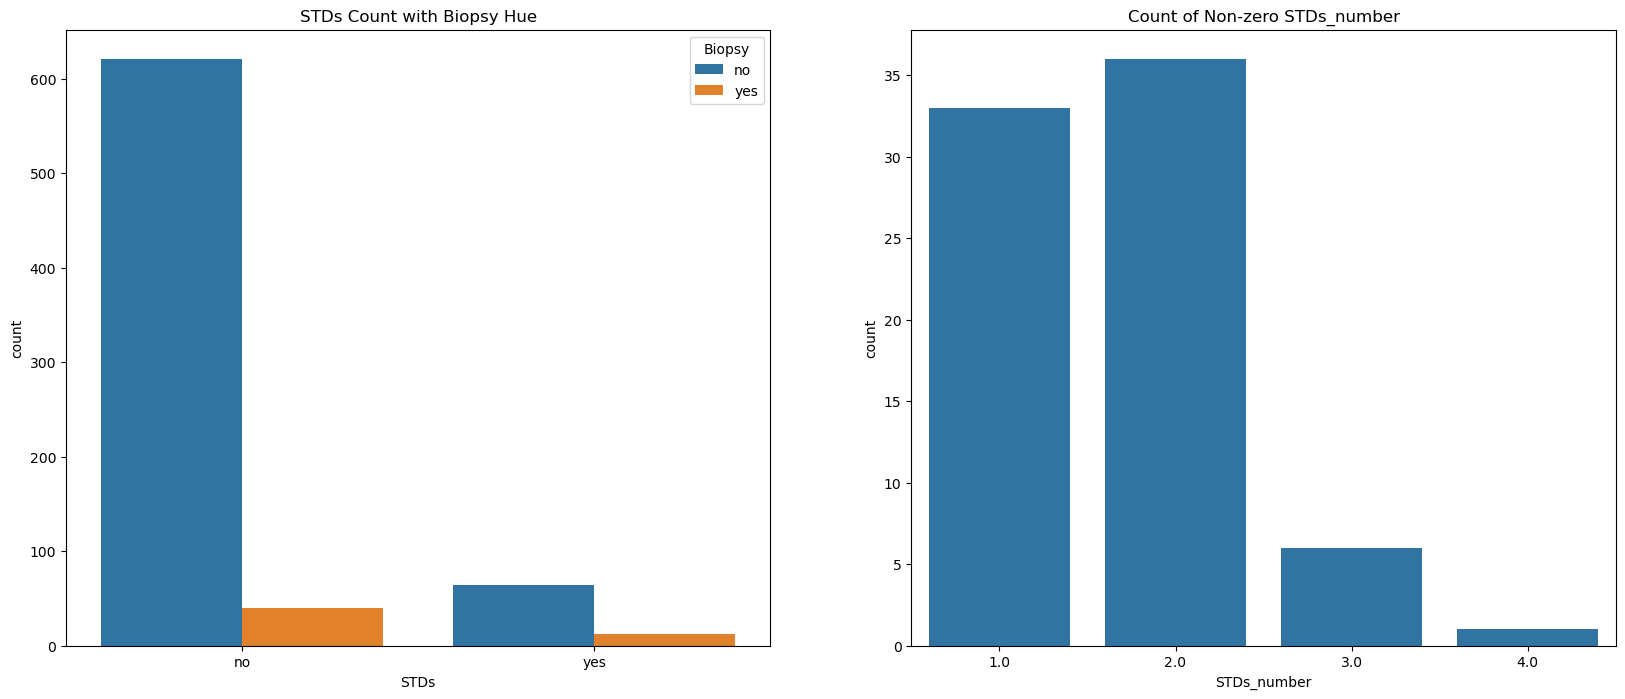

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the subplots with specified size
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# First subplot: Countplot for 'STDs' with 'Biopsy' as hue
sns.countplot(x='STDs', hue='Biopsy', data=impute, ax=axes[0])
axes[0].set_title("STDs Count with Biopsy Hue")

# Second subplot: Countplot for 'STDs_number' where 'STDs_number' > 0
sns.countplot(x=impute['STDs_number'][impute['STDs_number'] > 0], ax=axes[1])
axes[1].set_title("Count of Non-zero STDs_number")

# Display the plots
plt.show()

# plt.subplots(1,2, figsize=(20,8))
# plt.subplot(1,2,1)
# sns.countplot(impute['STDs'], hue=impute['Biopsy'])
# plt.subplot(1,2,2)
# sns.countplot(impute['STDs_number'][impute['STDs_number']>0])

##### Inferences :

* There is a huge difference between the proportions of the count of STDs i.e. clearly a very high percent of patients are not affected with any sexual diseases and onlly a very few (less than 100) are infected with those. So there's clearly an imbalance over here and so we can infer may be STD features won't be of much useful while building the models.
* Even among those who have any of the disease, only a very very few of them are tested positive.
* Also among thse STD people, most of them have either 1 or 2 sexual disease.

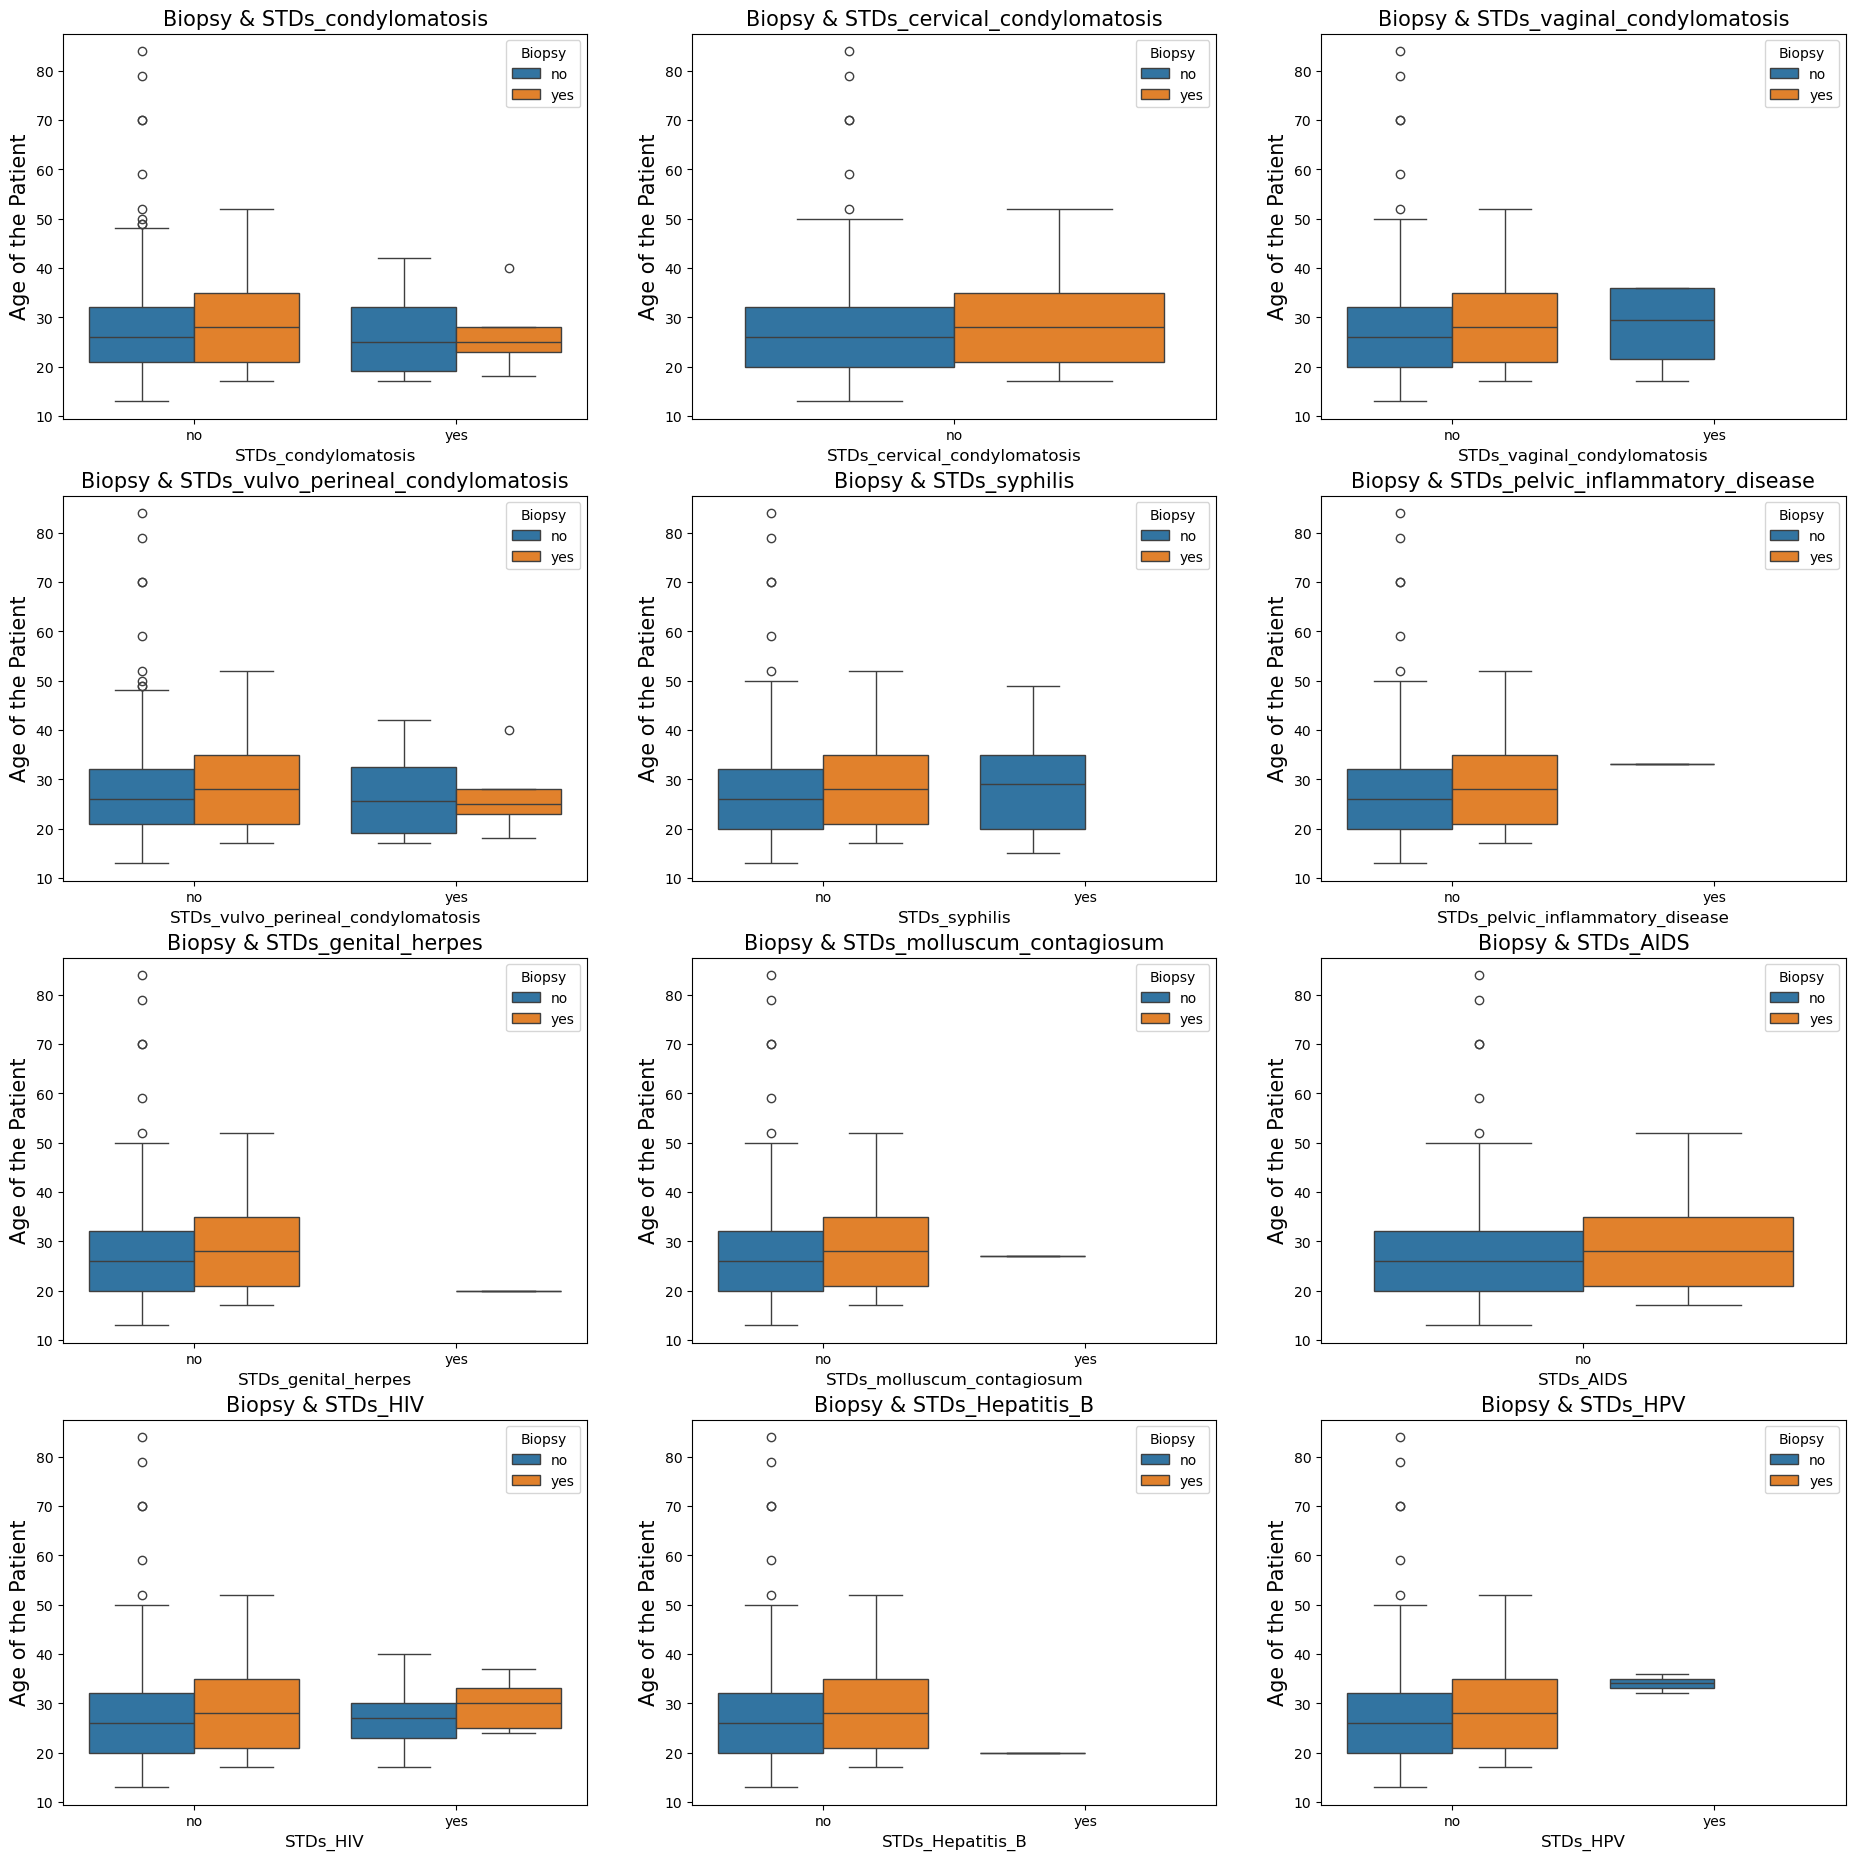

In [54]:
plt.subplots(4,3,figsize=(23,23))
var=['Dummy','STDs_condylomatosis',
 'STDs_cervical_condylomatosis',
 'STDs_vaginal_condylomatosis',
 'STDs_vulvo_perineal_condylomatosis',
 'STDs_syphilis',
 'STDs_pelvic_inflammatory_disease',
 'STDs_genital_herpes',
 'STDs_molluscum_contagiosum',
 'STDs_AIDS',
 'STDs_HIV',
 'STDs_Hepatitis_B',
 'STDs_HPV']
for i in np.arange(1,13):
    plt.subplot(4,3,i)
    d=sns.boxplot(hue='Biopsy',x=var[i],y='Age',data=impute)
    d.axes.set_title('Biopsy & ' + var[i],fontsize=15)
    d.set_xlabel(var[i],fontsize=12)
    d.set_ylabel('Age of the Patient',fontsize=15)

##### Inferences :

* In all the plots we can clearly the person with higher age are prone to be tested as Positive in Biopsy test
* We can not predict the effect of individual STDs as the data is not sufficient as there is class in imbalance

# Feature Engineering

### Outlier Treatment

In [55]:
numerical=['Age','No_of_sex_partner','First_sexual_intercourse','No_pregnancies','Smokes_yrs','Smokes_packs_yr',
 'Hormonal_Contraceptives_years','IUD_years'] # --> Choosing the proper numerical features 

df_copy = df.copy()
df_copy[numerical]=df_copy[numerical].astype('float64')

Age                                 Axes(0.125,0.712609;0.168478x0.167391)
No_of_sex_partner                Axes(0.327174,0.712609;0.168478x0.167391)
First_sexual_intercourse         Axes(0.529348,0.712609;0.168478x0.167391)
No_pregnancies                   Axes(0.731522,0.712609;0.168478x0.167391)
Smokes_yrs                          Axes(0.125,0.511739;0.168478x0.167391)
Smokes_packs_yr                  Axes(0.327174,0.511739;0.168478x0.167391)
Hormonal_Contraceptives_years    Axes(0.529348,0.511739;0.168478x0.167391)
IUD_years                        Axes(0.731522,0.511739;0.168478x0.167391)
dtype: object

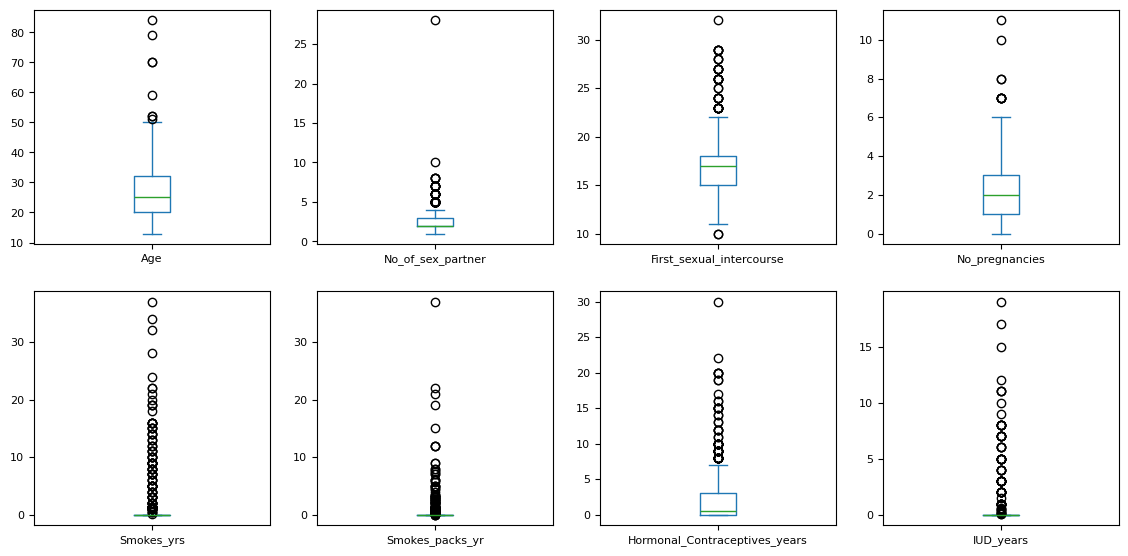

In [56]:
df_copy[numerical].plot(kind='box',subplots=True, layout=(4,4), fontsize=8, figsize=(14,14))

In [57]:
#calculating outliers using IQR method 
IQR=df_copy[numerical].describe().T['75%']-df_copy[numerical].describe().T['25%']
#T means transpose nikalaa aur uske baad percentile, iqr is inks difference q3-q1

min,max=[df_copy[numerical].describe().T['25%']-(IQR*1.5),df_copy[numerical].describe().T['75%']+(IQR*1.5)]
#here, lower bound(min) and upper bound(max) is calculated , the factoe 1.5 is a common choice for defining boundries for outliers
for i in numerical:
    print('range of',i,'b/w',min[i],'and',max[i])
#prints outliers boundry
for i in numerical:
    #For any value greater than the maximum threshold (max[i]), it sets those values to the maximum threshold.
    df_copy[i][df_copy[i]>max[i]]=max[i]
    # For any value less than the minimum threshold (min[i]), it sets those values to the minimum threshold.
    df_copy[i][df_copy[i]<min[i]]=min[i]

range of Age b/w 2.0 and 50.0
range of No_of_sex_partner b/w 0.5 and 4.5
range of First_sexual_intercourse b/w 10.5 and 22.5
range of No_pregnancies b/w -2.0 and 6.0
range of Smokes_yrs b/w 0.0 and 0.0
range of Smokes_packs_yr b/w 0.0 and 0.0
range of Hormonal_Contraceptives_years b/w -4.5 and 7.5
range of IUD_years b/w 0.0 and 0.0


C:\Users\sneha yadav\AppData\Local\Temp\ipykernel_12516\2495596121.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_copy[i][df_copy[i]>max[i]]=max[i]
C:\Users\sneha yadav\AppData\Local\Temp\ipykernel_12516\2495596121.py:9: SettingWithC

* Here using IQR technique, we have capped the extreme values above the upper whiscur value to the value of upper whiscur and similarly capped the extreme lower values to the value of lower whiscur value

Age                                 Axes(0.125,0.712609;0.168478x0.167391)
No_of_sex_partner                Axes(0.327174,0.712609;0.168478x0.167391)
First_sexual_intercourse         Axes(0.529348,0.712609;0.168478x0.167391)
No_pregnancies                   Axes(0.731522,0.712609;0.168478x0.167391)
Smokes_yrs                          Axes(0.125,0.511739;0.168478x0.167391)
Smokes_packs_yr                  Axes(0.327174,0.511739;0.168478x0.167391)
Hormonal_Contraceptives_years    Axes(0.529348,0.511739;0.168478x0.167391)
IUD_years                        Axes(0.731522,0.511739;0.168478x0.167391)
dtype: object

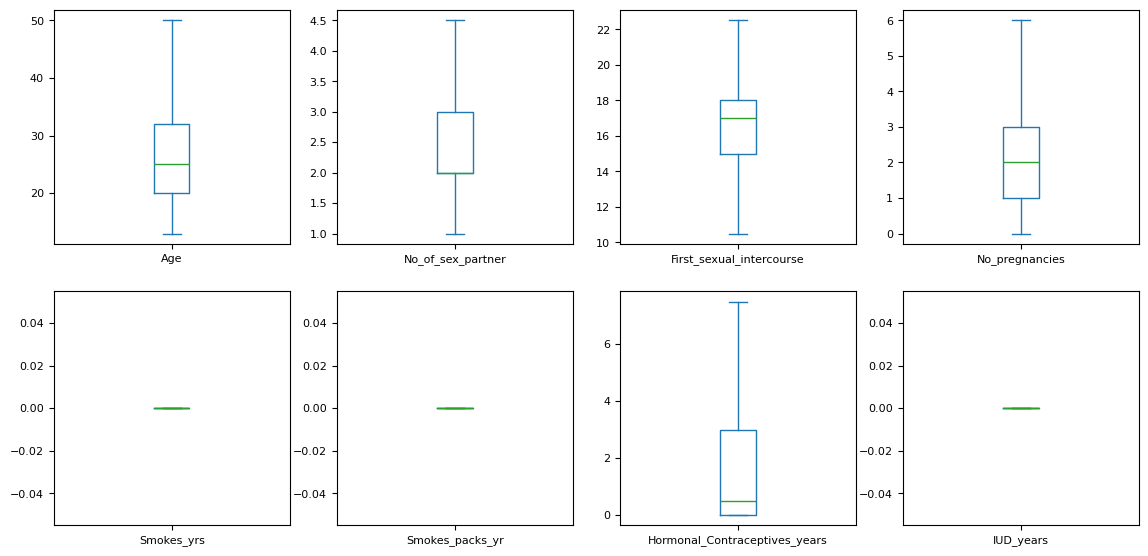

In [58]:
df_copy[numerical].plot(kind='box',subplots=True, layout=(4,4), fontsize=8, figsize=(14,14))

##### Inference :
    
* While building models ,though outliers removal may have positive impact like getting higher accuracy and other metrics.
    Once again since it's an medical dataset, it's not recommended to just cap or remove outliers.
    for example : there are some females who are aged 70+ which comes out as extreme values, generally we should not be 
    capping them to the upper whiscur value (around 50) as it would alter the information provided by the data.
    Hence we are here building models with the original values as such.

# Base Models

In [59]:
df = df.astype('float64')

x = df.drop('Biopsy', axis=1) #independent features
y = df['Biopsy'] # dependent feature

SS = StandardScaler()
df_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns) # as scaling mandotory for KNN model 

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)
x_train1,x_test1,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.3, random_state = 1)

l= []  #List to store the various model metrics 

In [60]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Impute missing values (if any) using SimpleImputer
imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

x_train1 = imputer.fit_transform(x_train1)
x_test1 = imputer.transform(x_test1)

l = []

# Logistic Regression Model
def models_lr(x, y):
    mod = {}
    model = LogisticRegression().fit(x, y)
    ypred = model.predict(x_test)
    mod['Model'] = 'LogisticRegression'
    mod['Train_Score'] = model.score(x, y)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test, ypred)
    mod['f1score'] = metrics.f1_score(y_test, ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    mod['roc_auc'] = metrics.roc_auc_score(y_test, ypred)
    
    print("Classification Report Logistic:")
    print(classification_report(y_test, ypred))
    
    return mod

l.append(models_lr(x_train, y_train))

# Decision Tree Model
def models_dt(x, y):
    mod = {}
    model = DecisionTreeClassifier().fit(x, y)
    ypred = model.predict(x_test)
    mod['Model'] = 'Decision Tree'
    mod['Train_Score'] = model.score(x_train, y_train)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test, ypred)
    mod['f1score'] = metrics.f1_score(y_test, ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    mod['roc_auc'] = metrics.roc_auc_score(y_test, ypred)
    
    print("Classification Report Decision Tree:")
    print(classification_report(y_test, ypred))
    
    return mod

l.append(models_dt(x_train, y_train))

# Random Forest Model
def models_rf(x, y):
    mod = {}
    model = RandomForestClassifier().fit(x, y)
    ypred = model.predict(x_test)
    mod['Model'] = 'Random Forest'
    mod['Train_Score'] = model.score(x_train, y_train)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test, ypred)
    mod['f1score'] = metrics.f1_score(y_test, ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    mod['roc_auc'] = metrics.roc_auc_score(y_test, ypred)
    
    print("Classification Report Random Forest:")
    print(classification_report(y_test, ypred))
    
    return mod

l.append(models_rf(x_train, y_train))

# K-Nearest Neighbors Model
def models_knn(x, y):
    mod = {}
    model = KNeighborsClassifier().fit(x, y)
    ypred = model.predict(x_test1)
    mod['Model'] = 'KNN'
    mod['Train_Score'] = model.score(x_train1, y_train)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test, ypred)
    mod['f1score'] = metrics.f1_score(y_test, ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    mod['roc_auc'] = metrics.roc_auc_score(y_test, ypred)
    
    print("Classification Report KNN:")
    print(classification_report(y_test, ypred))
    
    return mod

l.append(models_knn(x_train1, y_train))

l.append(models_rf(x_train,y_train))





C:\Users\sneha yadav\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report Logistic:
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       237
         1.0       0.58      0.47      0.52        15

    accuracy                           0.95       252
   macro avg       0.78      0.72      0.75       252
weighted avg       0.94      0.95      0.95       252

Classification Report Decision Tree:
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97       237
         1.0       0.58      0.73      0.65        15

    accuracy                           0.95       252
   macro avg       0.78      0.85      0.81       252
weighted avg       0.96      0.95      0.95       252

Classification Report Random Forest:
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       237
         1.0       0.50      0.67      0.57        15

    accuracy                           0.94       252
   macro avg       0.7

In [61]:
base_df = pd.DataFrame(l)
base_df

,Model,Train_Score,Test_accuracy,f1score,recall,precision,roc_auc
0,LogisticRegression,0.972696,0.948413,0.518519,0.466667,0.583333,0.722785
1,Decision Tree,1.000000,0.952381,0.647059,0.733333,0.578947,0.849789
2,Random Forest,1.000000,0.940476,0.571429,0.666667,0.500000,0.812236
3,KNN,0.950512,0.936508,0.333333,0.266667,0.444444,0.622785
4,Random Forest,1.000000,0.952381,0.600000,0.600000,0.600000,0.787342


# Final Model and Optimizations

* First of all, we have to take care of the data imbalance of the target variable.
* Here we have used OVERSAMPLING TECHNIQUE - SMOTE to overcome the data imbalance

### Sampling

In [64]:
from imblearn.over_sampling import SMOTE
x_train_s, y_train_s = SMOTE(random_state=33).fit_resample(x_train, y_train.ravel())
print(sorted(Counter(y_train_s).items()))

[(0.0, 547), (1.0, 547)]


C:\Users\sneha yadav\AppData\Local\Temp\ipykernel_12516\443992937.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  x_train_s, y_train_s = SMOTE(random_state=33).fit_resample(x_train, y_train.ravel())


In [65]:
from sklearn.metrics import classification_report
l_final = [] #--> New list for storing metrics of base models

def models_dt(x,y):
    mod = {}
    model = DecisionTreeClassifier().fit(x,y)
    ypred = model.predict(x_test)
    mod['Model'] = 'Decision Tree After Sampling'
    mod['Train_Score'] = model.score(x_train_s,y_train_s)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)

    return mod


l_final.append(models_dt(x_train_s,y_train_s))

def models_rf(x,y):
    mod = {}
    model = RandomForestClassifier().fit(x,y)
    ypred = model.predict(x_test)
    mod['Model'] = 'Random Forest After Sampling'
    mod['Train_Score'] = model.score(x_train_s,y_train_s)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l_final.append(models_rf(x_train_s,y_train_s))

In [66]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from imblearn.over_sampling import RandomOverSampler

def models_knn_s(x, y):
    mod = {}
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)
    selector = SelectKBest(mutual_info_classif, k=10)
    x_selected = selector.fit_transform(x_scaled, y)
    ros = RandomOverSampler(random_state=42)
    x_balanced, y_balanced = ros.fit_resample(x_selected, y)
    
    model = KNeighborsClassifier()
    model.fit(x_balanced, y_balanced)
    ypred = model.predict(selector.transform(scaler.transform(x_test)))
    
    mod['Model'] = 'KNN After Sampling'
    mod['Train_Score'] = model.score(x_balanced, y_balanced)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test, ypred)
    mod['f1score'] = metrics.f1_score(y_test, ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    mod['roc_auc'] = metrics.roc_auc_score(y_test, ypred)
    return mod


l_final.append(models_knn_s(x_train_s, y_train_s))

def models_lr(x, y):
    mod = {}
    model = LogisticRegression()
    model.fit(x, y)
    ypred = model.predict(x_test)
    mod['Model'] = 'LogisticRegression After Sampling'
    mod['Train_Score'] = model.score(x, y)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test, ypred)
    mod['f1score'] = metrics.f1_score(y_test, ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    ypred_proba = model.predict_proba(x_test)[:, 1]
    mod['roc_auc'] = metrics.roc_auc_score(y_test, ypred_proba)
    return mod

In [67]:
l_final.append(models_lr(x_train, y_train))
final_model = pd.DataFrame(l_final)
final_model

C:\Users\sneha yadav\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Train_Score,Test_accuracy,f1score,recall,precision,roc_auc
0,Decision Tree After Sampling,1.000000,0.948413,0.666667,0.866667,0.541667,0.910127
1,Random Forest After Sampling,1.000000,0.948413,0.628571,0.733333,0.550000,0.847679
2,KNN After Sampling,0.974406,0.908730,0.488889,0.733333,0.366667,0.826582
3,LogisticRegression After Sampling,0.972696,0.948413,0.518519,0.466667,0.583333,0.944866


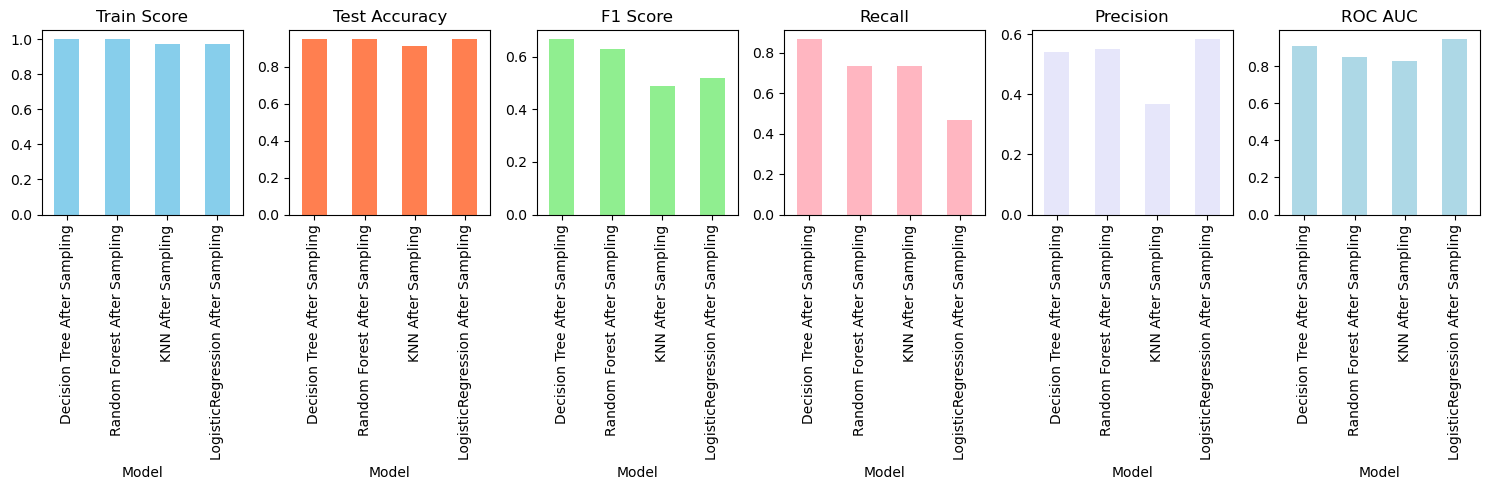

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the l_final list
df = pd.DataFrame(l_final)

# Set the 'Model' column as the index
df = df.set_index('Model')

# Create a bar plot for each metric
fig, axes = plt.subplots(1, 6, figsize=(15, 5))

df['Train_Score'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Train Score')

df['Test_accuracy'].plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Test Accuracy')

df['f1score'].plot(kind='bar', ax=axes[2], color='lightgreen')
axes[2].set_title('F1 Score')

df['recall'].plot(kind='bar', ax=axes[3], color='lightpink')
axes[3].set_title('Recall')

df['precision'].plot(kind='bar', ax=axes[4], color='lavender')
axes[4].set_title('Precision')

df['roc_auc'].plot(kind='bar', ax=axes[5], color='lightblue')
axes[5].set_title('ROC AUC')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

### Feature Selection

* We have used RFE technique for feature selection.


In [89]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

for i in range(1, df.shape[1] + 1):  # +1 because range is exclusive of the endpoint
    # Initialize RFE with DecisionTreeClassifier and number of features to select
    model = RFE(DecisionTreeClassifier(), n_features_to_select=i)
    model.fit(x, y)
    
    # Print selected features
    selected_features = x.columns[model.support_]
    print(f"Selected features for {i} features: {selected_features}")

    # Transform the dataset using selected features
    x_transformed = model.transform(x)
    
    # Split the data
    x_train, x_test, y_train, y_test = train_test_split(x_transformed, y, test_size=0.3, random_state=0)
    
    # Train and evaluate DecisionTreeClassifier
    dt = DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    y_pred = dt.predict(x_test)
    
    # Calculate and print ROC AUC score
    dt_recall = metrics.roc_auc_score(y_test, y_pred)
    print(f"ROC AUC Score for {i} features: {dt_recall}")
    print('*' * 100)









# final_model = []
# from sklearn.feature_selection import RFE
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split
# from sklearn import metrics

# # Assuming x and y are already defined

# for i in range(1, x.shape[1] + 1):  # Loop through the number of features
#     model = RFE(DecisionTreeClassifier(), n_features_to_select=i).fit(x, y)  # Corrected instantiation
#     print(x.columns[model.support_])  # Print the selected features
    
#     # Split the data based on the selected features
#     x_train, x_test, y_train, y_test = train_test_split(model.transform(x), y, test_size=0.3, random_state=0)
    
#     # Train the Decision Tree model
#     dt = DecisionTreeClassifier()
#     dt.fit(x_train, y_train)
    
#     # Predict on the test set
#     y_pred = dt.predict(x_test)
    
#     # Calculate the ROC AUC score
#     dt_recall = metrics.roc_auc_score(y_test, y_pred)
#     print(f"ROC AUC Score with {i} features: {dt_recall}")
    
#     print('*' * 100)




Selected features for 1 features: Index(['Schiller'], dtype='object')
ROC AUC Score for 1 features: 0.9112554112554113
****************************************************************************************************
Selected features for 2 features: Index(['Age', 'Schiller'], dtype='object')
ROC AUC Score for 2 features: 0.8008658008658008
****************************************************************************************************
Selected features for 3 features: Index(['Age', 'No_pregnancies', 'Schiller'], dtype='object')
ROC AUC Score for 3 features: 0.8008658008658008
****************************************************************************************************
Selected features for 4 features: Index(['Age', 'First_sexual_intercourse', 'No_pregnancies', 'Schiller'], dtype='object')
ROC AUC Score for 4 features: 0.751082251082251
****************************************************************************************************
Selected features for 5 features: In

In [90]:
rfe_dt = ['Age', 'No_of_sex_partner', 'First_sexual_intercourse',
       'No_pregnancies', 'Smokes', 'Smokes_yrs', 'Smokes_packs_yr',
       'Hormonal_Contraceptives', 'Hormonal_Contraceptives_years', 'IUD_years',
       'STDs', 'STDs_number', 'STDs_genital_herpes',
       'STDs_molluscum_contagiosum', 'STDs_AIDS', 'STDs_HIV', 'STDs_HPV',
       'STDs_No_of_diagnosis', 'Dx_CIN', 'Schiller', 'Citology']  # Set of features with high recall score

len(rfe_dt)



# rfe_dt = ['Age', 'No_of_sex_partner', 'First_sexual_intercourse',
#        'No_pregnancies', 'Smokes', 'Smokes_yrs', 'Smokes_packs_yr',
#        'Hormonal_Contraceptives', 'Hormonal_Contraceptives_years', 'IUD_years',
#        'STDs', 'STDs_number', 'STDs_genital_herpes',
#        'STDs_molluscum_contagiosum', 'STDs_AIDS', 'STDs_HIV', 'STDs_HPV',
#        'STDs_No_of_diagnosis', 'Dx_CIN', 'Schiller', 'Citology']  # Set of features with high recall score

# len(rfe_dt)

21

In [91]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Ensure you have defined x and y previously
for i in range(1, df.shape[1]):
    # Initialize RFE with RandomForestClassifier and the number of features to select
    model = RFE(estimator=RandomForestClassifier(), n_features_to_select=i)
    model = model.fit(x, y)
    
    # Print selected features
    print(x.columns[model.support_])
    
    # Transform the dataset based on selected features
    x_transformed = model.transform(x)
    
    # Split the transformed data
    x_train, x_test, y_train, y_test = train_test_split(x_transformed, y, test_size=0.3, random_state=0)
    
    # Train the model
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    
    # Make predictions
    y_pred = rf.predict(x_test)
    
    # Calculate metrics
    rf_recall = metrics.roc_auc_score(y_test, y_pred)
    print(rf_recall)
    print('*' * 100)







# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn import metrics

# # Assuming x and y are already defined

# for i in range(1, x.shape[1] + 1):  # Loop through the number of features
#     # Correct instantiation of RFE
#     model = RFE(estimator=RandomForestClassifier(), n_features_to_select=i).fit(x, y)
    
#     # Print the selected features
#     print(x.columns[model.support_])
    
#     # Split the data based on the selected features
#     x_train, x_test, y_train, y_test = train_test_split(model.transform(x), y, test_size=0.3, random_state=0)
    
#     # Train the Random Forest model
#     rf = RandomForestClassifier()
#     rf.fit(x_train, y_train)
    
#     # Predict on the test set
#     y_pred = rf.predict(x_test)
    
#     # Calculate the ROC AUC score
#     rf_recall = metrics.roc_auc_score(y_test, y_pred)
#     print(f"ROC AUC Score with {i} features: {rf_recall}")
    
#     print('*' * 100)


Index(['Schiller'], dtype='object')
0.9112554112554113
****************************************************************************************************
Index(['Age', 'Schiller'], dtype='object')
0.8722943722943723
****************************************************************************************************
Index(['Age', 'Hormonal_Contraceptives_years', 'Schiller'], dtype='object')
0.7835497835497836
****************************************************************************************************
Index(['Age', 'First_sexual_intercourse', 'Hormonal_Contraceptives_years',
       'Schiller'],
      dtype='object')
0.7943722943722944
****************************************************************************************************
Index(['Age', 'First_sexual_intercourse', 'Hormonal_Contraceptives_years',
       'Hinselmann', 'Schiller'],
      dtype='object')
0.8225108225108224
**************************************************************************************************

In [93]:
rfe_rf= ['Age', 'No_of_sex_partner', 'First_sexual_intercourse',
       'No_pregnancies', 'Smokes_yrs', 'Smokes_packs_yr',
       'Hormonal_Contraceptives', 'Hormonal_Contraceptives_years', 'IUD',
       'IUD_years', 'STDs_number', 'STDs_condylomatosis',
       'STDs_genital_herpes', 'Dx_CIN', 'Dx_HPV', 'Dx', 'Hinselmann',
       'Schiller', 'Citology']  # Set of features with high recall score

len(rfe_rf)




# rfe_rf= ['Age', 'No_of_sex_partner', 'First_sexual_intercourse',
#        'No_pregnancies', 'Smokes_yrs', 'Smokes_packs_yr',
#        'Hormonal_Contraceptives', 'Hormonal_Contraceptives_years', 'IUD',
#        'IUD_years', 'STDs_number', 'STDs_condylomatosis',
#        'STDs_genital_herpes', 'Dx_CIN', 'Dx_HPV', 'Dx', 'Hinselmann',
#        'Schiller', 'Citology']  # Set of features with high recall score

# len(rfe_rf)

19

In [104]:

l_feature = []
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, classification_report

# Assuming x and y are your original data and labels
from sklearn.model_selection import train_test_split

# Define your data, ensure x and y are initialized
# x, y = your feature matrix and target variable

# Splitting the data into training and test sets
x_train_s, x_test, y_train_s, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Convert them to DataFrames if not already
x_train_s = pd.DataFrame(x_train_s, columns=x.columns)
y_train_s = pd.DataFrame(y_train_s, columns=['Biopsy'])
x_test = pd.DataFrame(x_test, columns=x.columns)

# Assuming rfe_dt and rfe_rf are lists of selected features after RFE
rfe_dt_df_train = x_train_s[rfe_dt]
rfe_dt_df_test = x_test[rfe_dt]
rfe_rf_df_train = x_train_s[rfe_rf]
rfe_rf_df_test = x_test[rfe_rf]

# List to store model performances
l_feature = []

# Define the Decision Tree model function
def models_dt(x, y):
    mod = {}
    model = DecisionTreeClassifier().fit(x, y)
    ypred = model.predict(rfe_dt_df_test)
    mod['Model'] = 'Decision Tree after Feature Selection'
    mod['Train_Score'] = model.score(rfe_dt_df_train, y_train_s.values)
    mod['Test_accuracy'] = accuracy_score(y_test, ypred)
    mod['f1score'] = f1_score(y_test, ypred)
    mod['recall'] = recall_score(y_test, ypred)
    mod['precision'] = precision_score(y_test, ypred)
    mod['roc_auc'] = roc_auc_score(y_test, ypred)
    print(classification_report(y_test, ypred))
    return mod

l_feature.append(models_dt(rfe_dt_df_train, y_train_s.values))

# Define the Random Forest model function
def models_rf(x, y):
    mod = {}
    model = RandomForestClassifier().fit(x, y)
    ypred = model.predict(rfe_rf_df_test)
    mod['Model'] = 'Random Forest after Feature Selection'
    mod['Train_Score'] = model.score(rfe_rf_df_train.values, y_train_s.values)
    mod['Test_accuracy'] = accuracy_score(y_test, ypred)
    mod['f1score'] = f1_score(y_test, ypred)
    mod['recall'] = recall_score(y_test, ypred)
    mod['precision'] = precision_score(y_test, ypred)
    mod['roc_auc'] = roc_auc_score(y_test, ypred)
    print(classification_report(y_test, ypred))
    return mod

l_feature.append(models_rf(rfe_rf_df_train.values, y_train_s.values))



KeyError: RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)

In [105]:
l_feature_df = pd.DataFrame(l_feature)
l_feature_df

""


##### Inference :

* So the table shows obviously that recall score has got better after feature selection.
* Let's improve it further by tuning the hyper parameters of the models.

### Hyper Parameter Tuning

* Used Grid Search Cross Validation for Decision Trees and Randomized Search Cross Validation for Random Forest (GridSearchCV may taker longer time) for chosing the best paramter values

In [98]:
tree = DecisionTreeClassifier()
tree_param = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],  
    'max_depth':[3,4,5,6],
    'max_features':['auto','log2'],
    'random_state':[123]
}

grid = GridSearchCV(tree, tree_param, cv=10)
best_parameter_search = grid.fit(rfe_dt_df_train,y_train_s.values)
best_parameter_search.best_params_

C:\Users\sneha yadav\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
240 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sneha yadav\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sneha yadav\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\sneha yadav\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\sneha y

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'log2',
 'random_state': 123,
 'splitter': 'best'}

In [76]:
rf = RandomForestClassifier()
rf_params = {
    'n_estimators' : range(10,100,10),
    'max_depth' : range(2,10,1),
    'criterion' : ['gini','entropy'],
    'max_leaf_nodes' : range(2,10,1),
    'max_features' : ['auto','log2']
}

grid = RandomizedSearchCV(rf, rf_params, cv=10)
best_parameter_search = grid.fit(rfe_dt_df_train,y_train_s.values)
best_parameter_search.best_params_

C:\Users\sneha yadav\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\sneha yadav\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\sneha yadav\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\sneha yadav\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

{'n_estimators': 30,
 'max_leaf_nodes': 8,
 'max_features': 'log2',
 'max_depth': 9,
 'criterion': 'entropy'}

In [99]:
l_hyper = []

def models_dt(x,y):
    mod = {}
    model = DecisionTreeClassifier(criterion= 'gini', max_depth = 4, max_features = 'sqrt', random_state = 123, splitter = 'best').fit(x,y)
    ypred = model.predict(rfe_dt_df_test)
    mod['Model'] = 'Decision Tree after Hyperparameter Tuning'
    mod['Train_Score'] = model.score(rfe_dt_df_train,y_train_s.values)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(rfe_dt_df_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    print("Decision Tree Classification Report:")
    print(classification_report(y_test, model.predict(rfe_dt_df_test)))
    return mod
l_hyper.append(models_dt(rfe_dt_df_train,y_train_s.values))

def models_rf(x,y):
    mod = {}
    model = RandomForestClassifier(criterion= 'gini', max_depth = 9, max_features = 'log2', max_leaf_nodes=9, n_estimators=50).fit(x,y)
    ypred = model.predict(rfe_rf_df_test)
    mod['Model'] = 'Random Forest After Hyperparameter Tuning'
    mod['Train_Score'] = model.score(rfe_rf_df_train,y_train_s.values)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(rfe_rf_df_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    print("Random Forest Classification Report:")
    print(classification_report(y_test, model.predict(rfe_rf_df_test)))
    return mod
l_hyper.append(models_rf(rfe_rf_df_train,y_train_s.values))

ValueError: Found input variables with inconsistent numbers of samples: [252, 168]

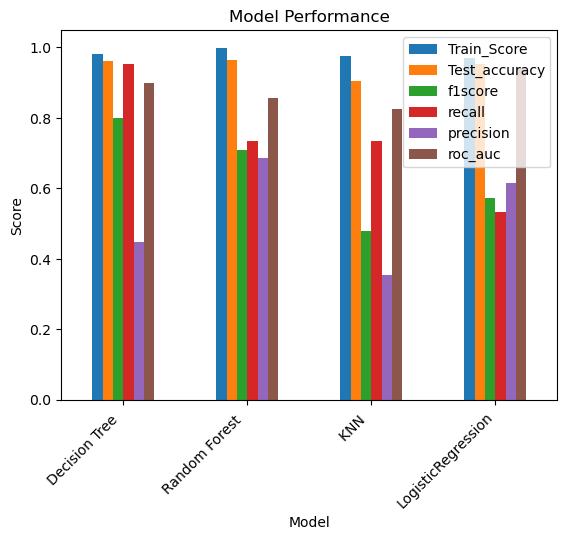

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

data = {'Model': ['Decision Tree ', 'Random Forest ', 'KNN ', 'LogisticRegression'],
        'Train_Score': [0.982633, 0.999086, 0.974406, 0.970990],
        'Test_accuracy': [0.960317, 0.964286, 0.904762, 0.952381],
        'f1score': [0.800000, 0.709677, 0.478261, 0.571429],
        'recall': [0.952381, 0.733333, 0.733333, 0.533333],
        'precision': [0.448276, 0.687500, 0.354839, 0.615385],
        'roc_auc': [0.899578, 0.856118, 0.824473, 0.940647]}

df = pd.DataFrame(data)

# Create a bar plot
df.plot(x='Model', y=['Train_Score', 'Test_accuracy', 'f1score', 'recall', 'precision', 'roc_auc'], kind='bar')
plt.title('Model Performance')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

In [79]:
l_hyper_df = pd.DataFrame(l_hyper)
l_hyper_df

,Model,Train_Score,Test_accuracy,f1score,recall,precision,roc_auc
0,Decision Tree after Hyperparameter Tuning,0.968657,0.910714,0.347826,0.222222,0.8,0.607778
1,Random Forest After Hyperparameter Tuning,0.973134,0.910714,0.285714,0.166667,1.0,0.583333


## Ensembling

### Bagging

C:\Users\sneha yadav\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Bagged Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       150
         1.0       1.00      0.06      0.11        18

    accuracy                           0.90       168
   macro avg       0.95      0.53      0.53       168
weighted avg       0.91      0.90      0.86       168



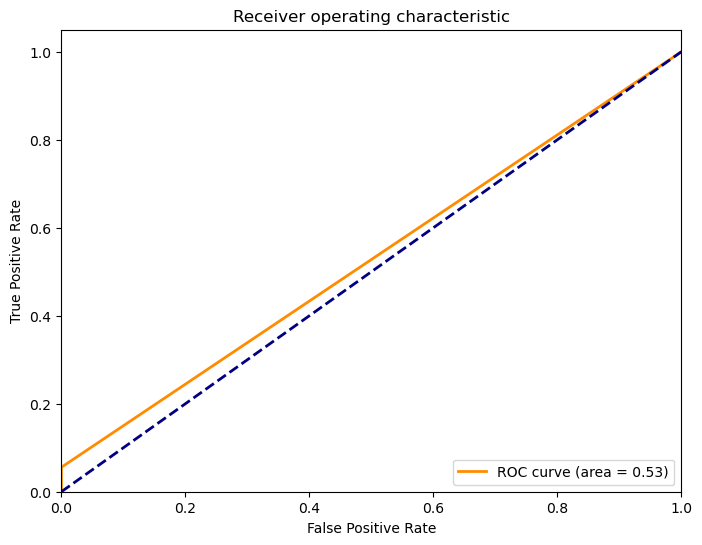

In [87]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, classification_report
import matplotlib.pyplot as plt

l_ensemble = []

# Function for bagging with hyperparameter-tuned Decision Tree
def bagg(x, y):
    mod = {}
    # Corrected 'estimator' parameter
    model = BaggingClassifier(
        estimator=DecisionTreeClassifier(
            criterion='gini', max_depth=4, max_features='sqrt', random_state=123, splitter='best'
        )
    ).fit(x, y)
    
    ypred = model.predict(rfe_dt_df_test)
    mod['Model'] = 'Bagged Decision Tree with Hyperparameter'
    mod['Train_Score'] = model.score(rfe_dt_df_train, y_train_s.values)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test, ypred)
    mod['f1score'] = metrics.f1_score(y_test, ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    mod['roc_auc'] = metrics.roc_auc_score(y_test, ypred)

    print("Bagged Decision Tree Classification Report:")
    print(classification_report(y_test, ypred))

    # Plotting ROC Curve
    fpr, tpr, _ = roc_curve(y_test, ypred)
    auc_value = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return mod

l_ensemble.append(bagg(rfe_dt_df_train, y_train_s.values))



## Boosting

### Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.metrics import classification_report
import numpy as np

def gb(x, y, x_test, y_test):
    mod = {}

    # Impute missing values in both train and test sets
    imputer = SimpleImputer(strategy='mean')
    x = imputer.fit_transform(x)
    x_test = imputer.transform(x_test)
    
    model = GradientBoostingClassifier(learning_rate=0.01, random_state=1).fit(x, y)
    
    ypred = model.predict(x_test)
    mod['Model'] = 'Gradient Boost'
    mod['Train_Score'] = model.score(x, y)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test, ypred)
    mod['f1score'] = metrics.f1_score(y_test, ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    mod['roc_auc'] = metrics.roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])
    
    print(classification_report(y_test, ypred))
    
    return mod

# Call the function with the correct parameters
l_ensemble.append(gb(rfe_dt_df_train, y_train_s.values, rfe_dt_df_test, y_test))

In [ ]:
!pip install xgboost

**XGBoost**

In [ ]:
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# XGBoost Model Definition
def xgb(x, y):
    mod = {}
    model = XGBClassifier(
        learning_rate=0.01, random_state=1, n_estimators=1000, 
        max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, 
        colsample_bytree=0.8, reg_alpha=0.005
    ).fit(x, y)
    
    ypred = model.predict(rfe_dt_df_test)
    mod['Model'] = 'XGBoost'
    mod['Train_Score'] = model.score(rfe_dt_df_train, y_train_s.values)
    mod['Test_accuracy'] = accuracy_score(y_test, ypred)
    mod['f1score'] = f1_score(y_test, ypred)
    mod['recall'] = recall_score(y_test, ypred)
    mod['precision'] = precision_score(y_test, ypred)
    mod['roc_auc'] = roc_auc_score(y_test, ypred)
    
    print(classification_report(y_test, ypred))
    
    # Plotting ROC Curve
    fpr, tpr, _ = roc_curve(y_test, ypred)
    auc_value = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    return mod

# Append results to your list
l_ensemble.append(xgb(rfe_dt_df_train, y_train_s.values))


In [ ]:
final_ensemble_df = pd.DataFrame(l_ensemble)

final_ensemble_df

# Conclusion :

* We believe that the models we have chosen will assist the medical experts to predict the cancer more precisely than the traditional methods.
- Moreover, the faster diagnosis of early stages of the cancer can be done with the help of this  model. 
- This model will also be cost effective method for low and middle class community. 